## Análise do dataset

Neste notebook iremos apenas analisar como os dados estão distribuidos, com visualizações e verificações de inconsistências, além de fazer sugestões para lidar com os diferentes tipos de dados, e também como iremos enfrentar os dados faltantes.

Assim, aqui não será realizado nenhuma técnica de pré-processamento de fato, isto será feito no próximo notebook, este notebook tem o único intuito de analisar os atributos, verificar seus tipos e valores.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Lendo o conjunto de dados

df = pd.read_csv("train.csv")

#Exibindo o cabeçalho do conjunto de dados
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Tamanho do conjunto de dados
df.shape

(1460, 81)

Podemos compreender que termos muitos atributos para poder lidar durante a nossa análise exploratória, e como podemos ver existem diversos valores NULOS que devem ser tratados, além obviamente de tratar os atributos categóricos, que devem ser transformados para numérico, mas isto deve ser feito com cuidado, já que caso usemos One-Hot-Encoding, podemos ter um número de atributos preditivos muito grande, o que pode atrapalhar o modelo de regressão.

In [4]:
# Verificando os tipos de atributo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Temos 38 atributos numéricos e 43 atributos categóricos. Logo teremos bastante trabalho pela frente. Além disso podemos perceber que existem diversos valores nulos

In [5]:
df.isna().sum().sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

Podemos perceber acima, que , como temos 1460 linhas, existem alguns atributos que contém a maioria dos valores NULOS, o que é muito problemático. Assim, é extremamente necessário tratar valores NULOS

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Análise individual de atributos

In [7]:
# Core do gráfico
colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'black',
    'orange',
    'purple',
    'brown',
    'pink',
    'gray',
    'olive',
    'teal',
    'coral',
    'gold',
    'navy',
    'peru',
]

In [8]:
def reduce(bars):
    
    for index,i in enumerate(bars):
        if len(i) > 3:
            i = i[:3]
        bars[index] = i
    return bars

In [9]:
# Função para plotar dados categóricos
def plot_categorical(df,col_name,big=False):
    
    bars = df[col_name].value_counts().keys().to_numpy()
    y = df[col_name].value_counts().values
    
    if big:
        bars = reduce(bars)
        
    x_pos = np.arange(len(bars))
    
    cols = colors[:len(bars)]

    # Create bars with different colors
    plt.bar(x_pos,y, color=cols)

    # Create names on the x-axis
    plt.xticks(x_pos, bars)
    
    plt.ylabel("Frequency")
    plt.xlabel(f"{col_name}")
    plt.title(f"Frequency for each value of {col_name}")
    # Show graph
    plt.show()

In [10]:
# Função para plotar dados numéricos
def plot_numeric(df,col_name):
    


    # Create bars with different colors
    sns.kdeplot(df[col_name])

    
    plt.ylabel("Density")
    plt.xlabel(f"{col_name}")
    plt.title(f"Density for each value of {col_name}")
    # Show graph
    plt.show()

In [11]:
# Função que exibe algumas propriedades do atributo

def numeric_eda(df):
    print(f"A media eh : {df.mean()}")

    print(f"O maximo eh : {df.max()}")

    print(f"O minimo eh : {df.min()}")


### ID

Varíavel com o único intuito de dar um id para a amostra, logo não tem uma representação e no momento de feature selection ela será removida.

### MSSubClass

Esse atributo é numérico, e  se refere a classe do prédio.

In [12]:
mssubclass = df.MSSubClass

In [13]:
# Verificando se possui algum valor NULO.
mssubclass.isna().sum()

0

In [14]:
numeric_eda(mssubclass)

A media eh : 56.897260273972606
O maximo eh : 190
O minimo eh : 20


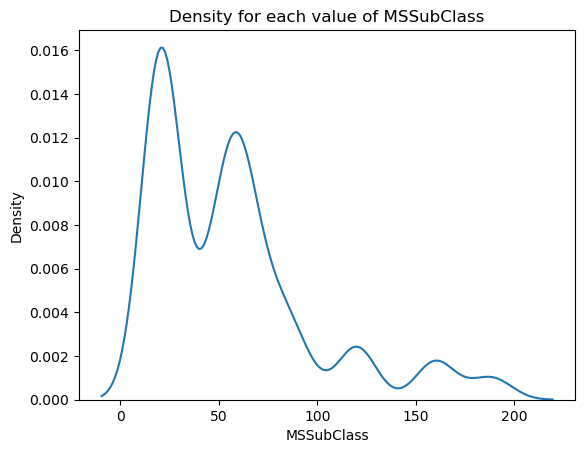

In [15]:
# Vamos verificar como este atributo está distribuido
plot_numeric(df,'MSSubClass')

A maioria dos valores está localizado entre 0 e 100, e existe uma quantidade de valores que está localizado entre 100 e 200.


    20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES


In [16]:
del mssubclass

### MSZoning

Este atributo é um atributo categórico e é referente a zona da cidade de Iowa que esta casa está localizada.

In [17]:
mszoning = df.MSZoning

In [18]:
# Verificando se temos valores NULOS
mszoning.isna().sum()

0

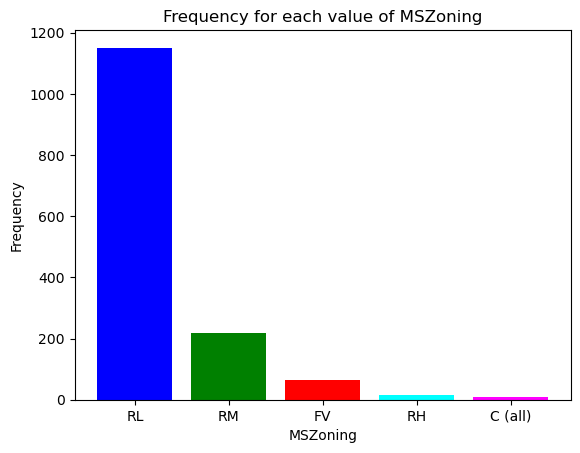

In [19]:
plot_categorical(df,"MSZoning")

Percebemos acima que a maioria das zonas que as casas estão localizadas é o RL e as outras tem uma quantidade menor de casas.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [20]:
del mszoning

### LotFrontage

Este atributo é o tamanho em pés da calçada conectada a propriedade. Sendo um atributo numérico

In [21]:
lotfrontage = df.LotFrontage

In [22]:
# Verificando se temos valores NULOS
lotfrontage.isna().sum()

259

In [23]:
numeric_eda(lotfrontage)

A media eh : 70.04995836802665
O maximo eh : 313.0
O minimo eh : 21.0


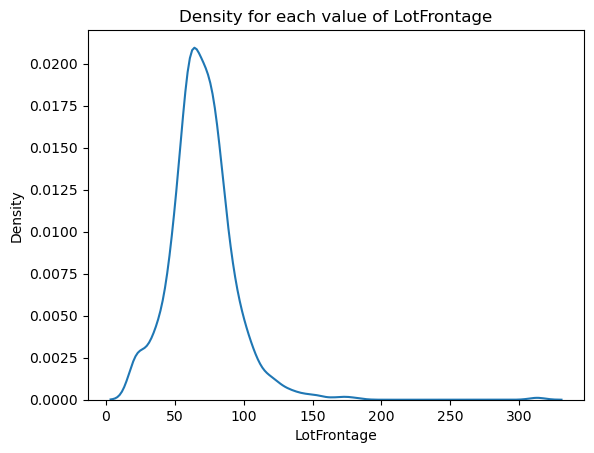

In [24]:
plot_numeric(df,'LotFrontage')

Podemos verificar que a maoria dos valores esta entre 0 e 150, adotando quase uma distribuição normal, tendo uma simetria entre 50 e 100.

Quando formos tratar valores nulos iremos precisas lidar com este atributo de uma maneira que seja possível nao atrapalhar a distribuição do nosso conjunto.

In [25]:
del lotfrontage

### LotArea

Este é um atributo numérico do nosso conjunto de dados, e representa o tamanho do lote da propriedade em pés quadrados.

In [26]:
lotarea = df.LotArea

In [27]:
# Verificando se temos valores NULOS

lotarea.isna().sum()

0

In [28]:
# Verificando propriedades do atributo
numeric_eda(lotarea)

A media eh : 10516.828082191782
O maximo eh : 215245
O minimo eh : 1300


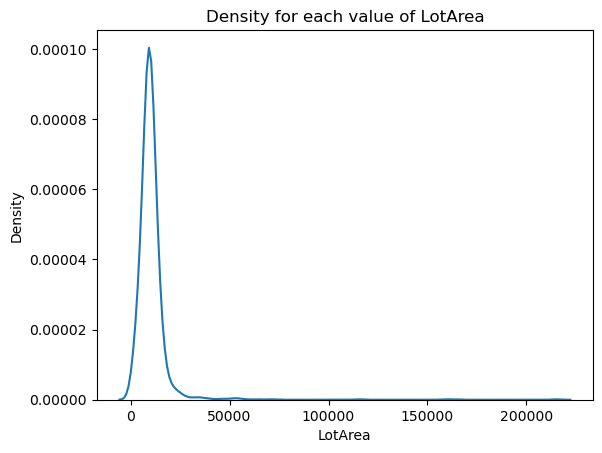

In [29]:
# Plotando a kde do atributo
plot_numeric(df,'LotArea')

Acima, podemos compreender que a maioria dos valores para a área do lote está entre 0 - 50.000

In [30]:
del lotarea

### Street

Um atributo binário que contém dois valores e representa o tipo de acesso a propriedade, se é uma rua de cascalho ou uma rua pavimentada

In [31]:
street = df.Street

In [32]:
# Verificando se temos valores NULOS
street.isna().sum()

0

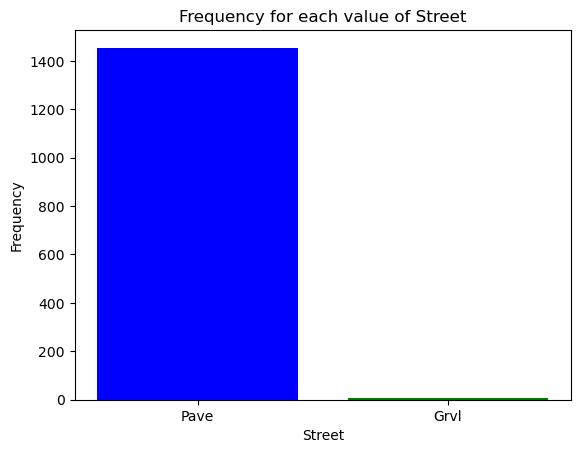

In [33]:
plot_categorical(df,"Street")

Podemos notar claramente que existe uma vasta discrepância entre ruas de cascalho e ruas pavimentadas neste conjunto de dados, o que é entendível visto que não é muito comum em grandes cidades as ruas não serem pavimentadas.

In [34]:
del street

### Alley

Este atributo é muito semelhante ao anterior, sendo um categórico binário também, mas possuindo valores NULOS, e representa o tipo de rua para o acesso por "trás" da casa. Caso não haja esse tipo de acesso o valor é NULO.

In [35]:
alley = df.Alley

In [36]:
# Verificando se temos valores NULOS
alley.isna().sum()

1369

Podemos perceber que a maioria dos valores para este atributo são nulos, teriámos menos de 100, o que é algo bem problemático e provavelmente na hora de selecionar os atributo este atributo será removido.

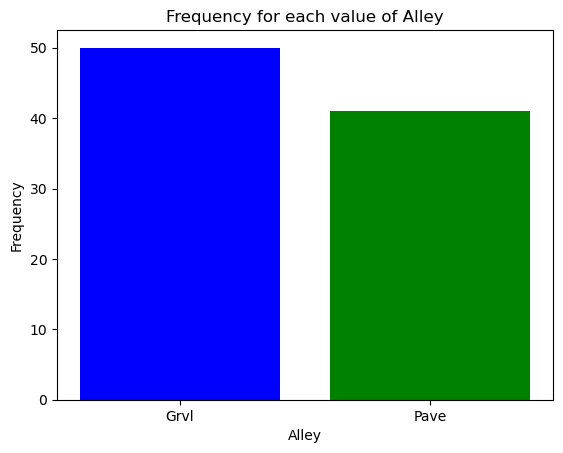

In [37]:
plot_categorical(df,'Alley')

Diferentemente do atributo anterior, temos mais valores para sem pavimentação, mas isso é um pouco entendível, já que a chance de um lugar pavimentado não possuir acesso lateral é maior, já que pode se tratar de um prédio ou algo do tipo.

In [38]:
del alley

### LotShape

Um atributo categórico que indica o formato da propriedade. POdendo ter 4 valores possíveis

In [39]:
lotshape = df.LotShape

In [40]:
# Verificando se temos valores NULOS
lotshape.isna().sum()

0

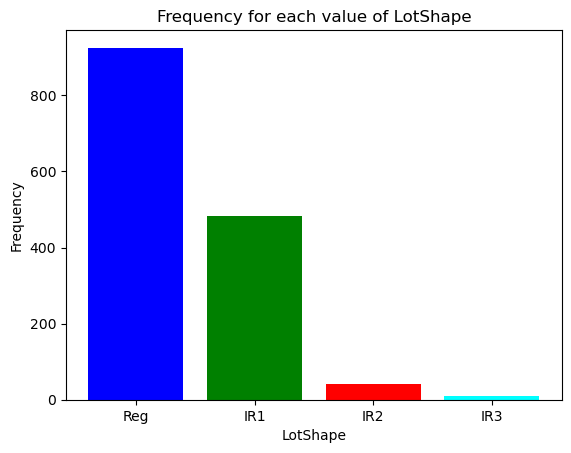

In [41]:
# Plotando a frequencia de cada valor
plot_categorical(df,'LotShape')

Conseguimos inferir pelo gráfico que o formato regular é o mais presente no nosso conjunto de dados, junto com o IR1, que representa que há um pouco de irregularidade no formato.

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [42]:
del lotshape

### LandContour

Esta variável representa o quão plano uma propriedade é, podendo ter alguns valores cateǵoricos para representar isto

In [43]:
land = df.LandContour

In [44]:
# Verificando se temos valores NULOS
land.isna().sum()

0

Felizmente não temos valores nulos o que é de suma importância

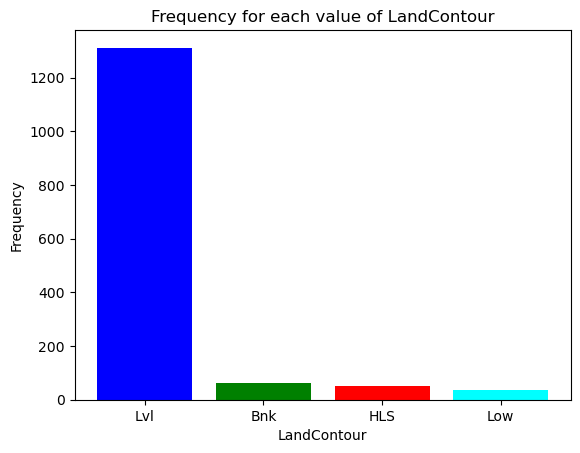

In [45]:
# Plot das frequencia do atributo
plot_categorical(df,"LandContour")

Podemos verificar que a maioria das propriedaes está localizada em um terreno plano, o que é entendível visto que o relevo de Iowa, e majoritariamente plánice, e além disso as casas nos EUA são bastante planejadas.

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [46]:
del land

### Utilities

Este atributo contém as utilidades que a propriedade contém. Nesse caso (Eletricidade, Agua, Gas e Septic Tank). Sendo um atributo categórico, que pode ser muito facilmente transformado para 4 atributos binários, indicando a presença de cada utilidade.

In [47]:
util = df.Utilities

In [48]:
# Verificando se temos valores NULOS
util.isna().sum()

0

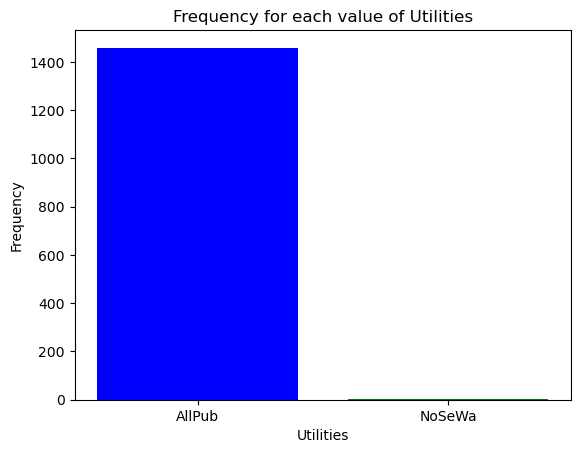

In [49]:
# Plotando a distribuição dos valores
plot_categorical(df,'Utilities')

O esperado era realmente isto, que a maioria das propriedaes fosse equipada com todas as utilidades.

       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

In [50]:
del util

### LotConfig

Atributo categórico que indica a configuração do lote

In [51]:
lotconfig = df.LotConfig

In [52]:
# Verificando a presença de valores NULOS
lotconfig.isna().sum()

0

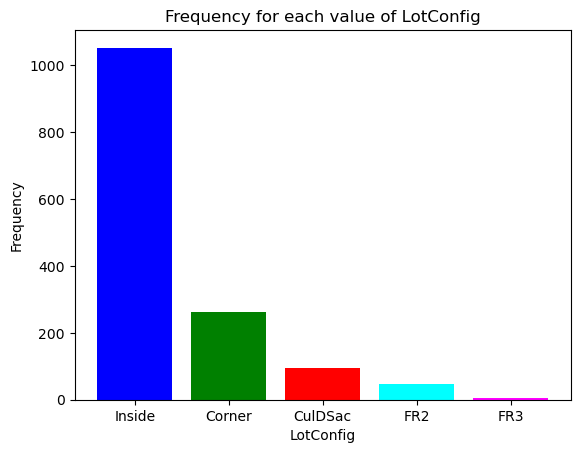

In [53]:
# Plotando a frequencia de cada valor
plot_categorical(df,'LotConfig')

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [54]:
del lotconfig

### LandSlope

Atributo categórico que define o declive da propriedade, podendo assumir 3 valores

In [55]:
landslope = df.LandSlope

In [56]:
# Verificando se temos valores NULOS
landslope.isna().sum()

0

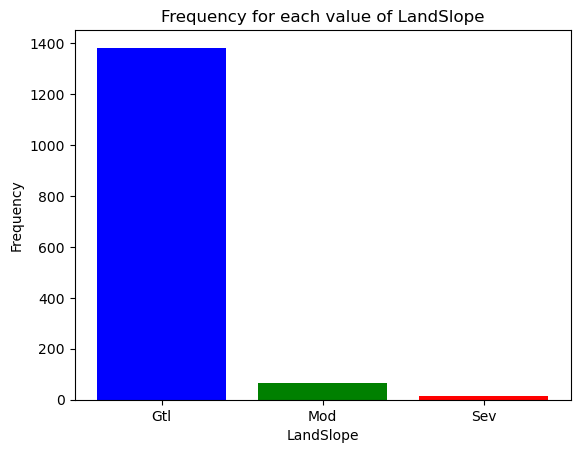

In [57]:
# Plotando a frequencia de cada um
plot_categorical(df,'LandSlope')

       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

In [58]:
del landslope

### Neighborhood

Um atributo categórico com muitos valores, que indica pontos de referência das propriedades 

In [59]:
neigh = df.Neighborhood

In [60]:
neigh.isna().sum()

0

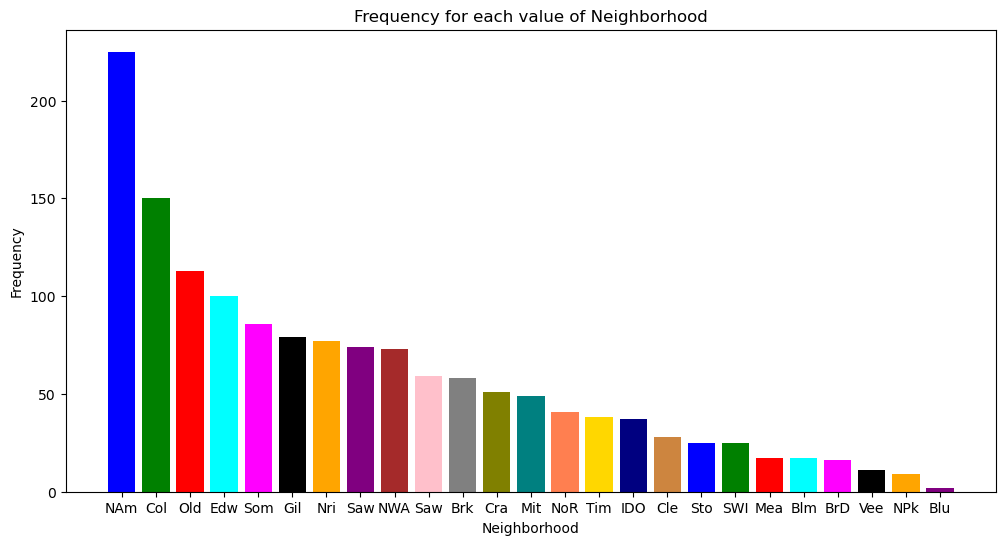

In [61]:
# Plotando a frequencia para cada valor
plt.figure(figsize=(12,6))
plot_categorical(df,"Neighborhood",True)

Podemos entender que temos muitos valores bem distribuidos no nosso conjunto de dados de treino.

In [62]:
del neigh

### Condition 1

Este atributo é categórico e possui a proximidade de uma propriedade aos principais pontos da cidade

In [63]:
cond = df.Condition1

In [64]:
cond.isna().sum()

0

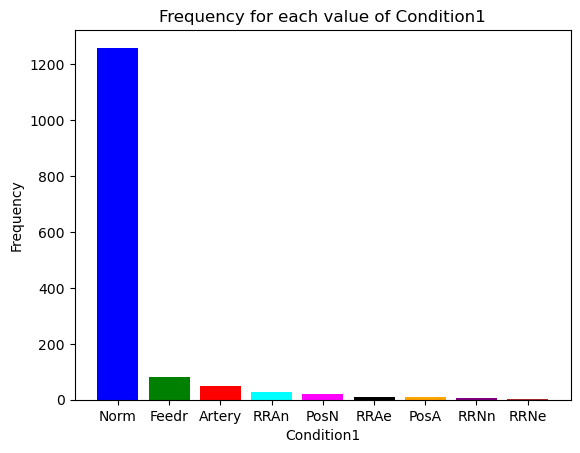

In [65]:
# Plot as frequencias
plot_categorical(df,'Condition1')

	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [66]:
del cond

### Condition 2

Igual ao atributo anterior, mas caso a propriedade tenha duas destas condições a segunda é colocada aqui.

In [67]:
cond = df.Condition2

In [68]:
cond.isna().sum()

0

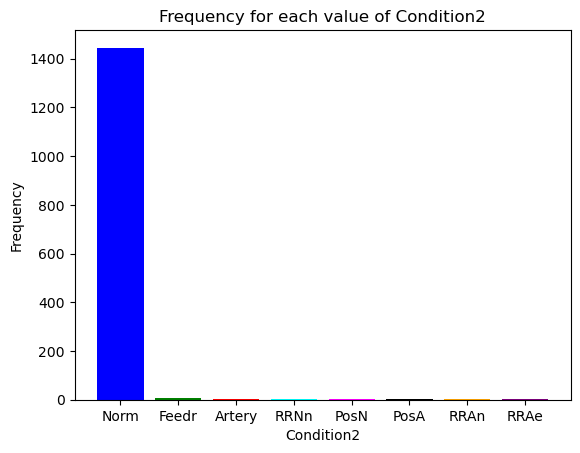

In [69]:
# Plot as frequencias
plot_categorical(df,'Condition2')

In [70]:
del cond

### BldgType

Atributo categórico que indica o tipo de habitação que a propriedade é

In [71]:
dgtype = df.BldgType

In [72]:
dgtype.isna().sum()

0

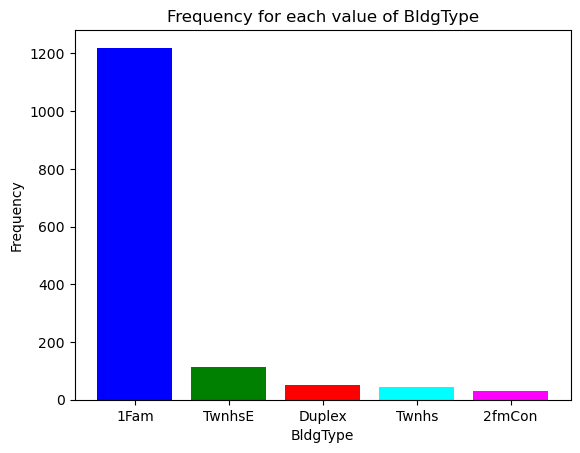

In [73]:
# Plotando as frequencias
plot_categorical(df,'BldgType')

       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

In [74]:
del dgtype

### HouseStyle

Este atributo é categórico e representa o estilo de habitação da propriedade, dando mais informações que o atributo anterior.

In [75]:
house = df.HouseStyle

In [76]:
# Verificando se temos algum valor NULO
house.isna().sum()

0

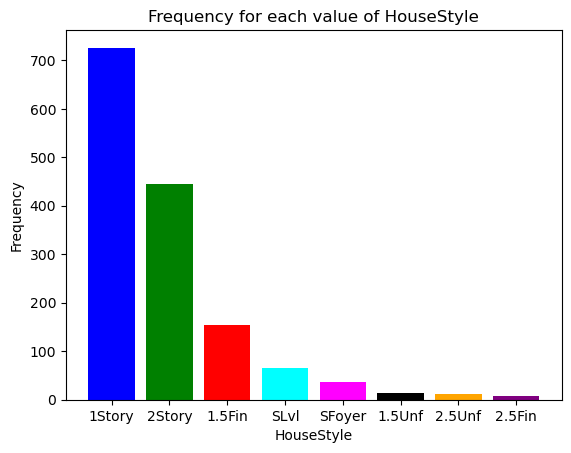

In [77]:
# Verificando a frequencia de cada valor
plot_categorical(df,'HouseStyle')

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

In [78]:
del house

### OverallQual

Este atributo é um atributo categórico ordinal, porém esta disposto de maneira numérica, e será mantido desta maneira, já que existe uma relação de ordem entre os valores, que representa o rate do material usado e como ela foi finilizada, ou seja as detalhes

In [79]:
over = df.OverallQual

In [80]:
# Verificando se temos valores NULOS
over.isna().sum()

0

In [81]:
# Verificando as propriedade
numeric_eda(over)

A media eh : 6.0993150684931505
O maximo eh : 10
O minimo eh : 1


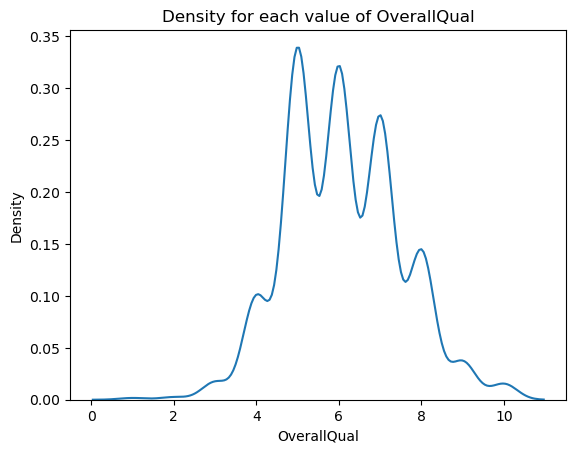

In [82]:
# Verificando a distribuição deste atributo
plot_numeric(df,'OverallQual')

Podemos verificar que a maioria dos valores esta concentrada entre 5 e 7, o que indica que a maioria das propriedades estão conservadas, sendo algumas muito conservadas e outras bem pouco.

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [83]:
del over

### OverallCond

Muito parecido com o atributo anterior, possuindo os mesmo valores, mas o rate é em relação a casa em geral 

In [84]:
over = df.OverallCond

In [85]:
# Verificando se temos valores NULOS
over.isna().sum()

0

In [86]:
# Verificando as propriedade
numeric_eda(over)

A media eh : 5.575342465753424
O maximo eh : 9
O minimo eh : 1


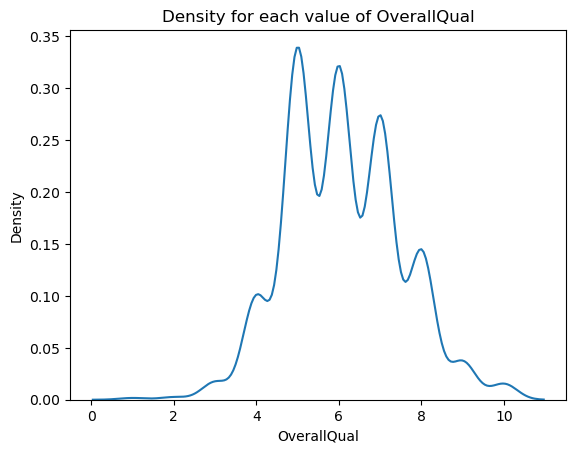

In [87]:
# Verificando a distribuição deste atributo
plot_numeric(df,'OverallQual')

Diferentemente do atributo anterior, podemos verificar que não há nenhuma propriedade dentre todas que tem o valor 10 para esse atributo.

In [88]:
del over

### YearBuilt

Ano de construção do prédio, um atributo numérico. Entretanto pode não ser interessante tratar este valor como ano, mas sim, podemos lidar com ele como sendo a quanto tempo ele foi construído, para deixar em uma escala um pouco menor.

In [89]:
year = df.YearBuilt

In [90]:
# Verificando se temos algum valor NULO
year.isna().sum()

0

In [91]:
# Verificando propriedades do atributo
numeric_eda(year)

A media eh : 1971.267808219178
O maximo eh : 2010
O minimo eh : 1872


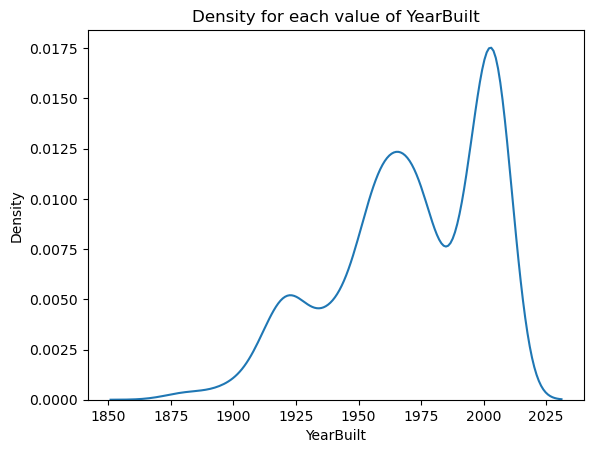

In [92]:
plot_numeric(df,'YearBuilt')

Futuramente este atributo será transformado, para um valor que represente a idade dele, e não a "data de nascimento"

In [93]:
del year

### YearRemodAdd

Este atributo é referente a data que o prédio foi remodelado, caso ele não tenha sido é a mesma data de construção

In [94]:
year = df.YearRemodAdd

In [95]:
# Verificando se temos algum valor NULO
year.isna().sum()

0

In [96]:
# Verificando propriedades do atributo
numeric_eda(year)

A media eh : 1984.8657534246574
O maximo eh : 2010
O minimo eh : 1950


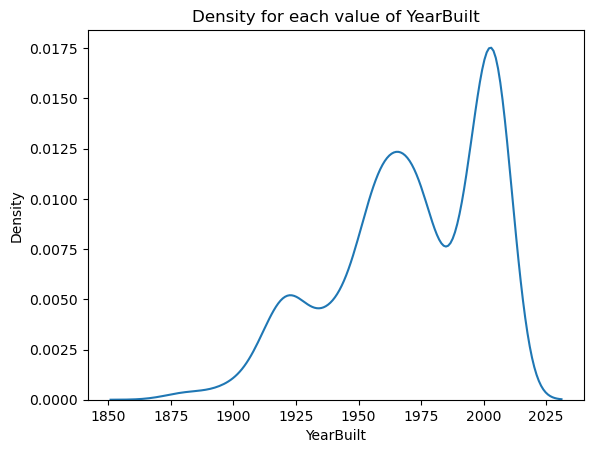

In [97]:
plot_numeric(df,'YearBuilt')

In [98]:
df[df.YearBuilt == df.YearRemodAdd].shape[0]

764

Com a consulta acima, podemos perceber que metade dos prédios tem a mesma data de remodelação e de construção. Este atributo sofrerá a mesma transformação do que o anterior.

In [99]:
del year

### RoofStyle

Este atributo é um atributo categórico e representa o tipo de telhado da casa.

In [100]:
roof = df.RoofStyle

In [101]:
# Verificando se temos valores NULOS
roof.isna().sum()

0

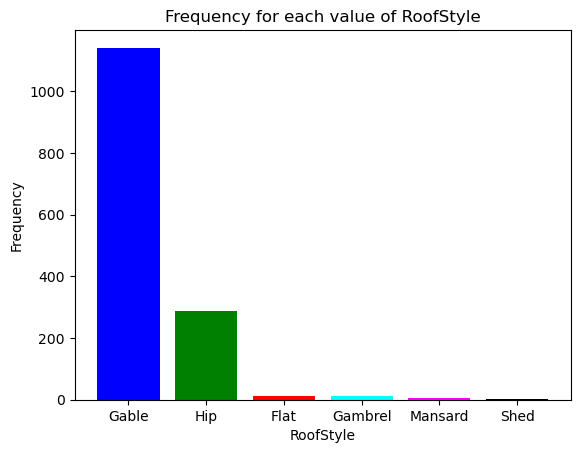

In [102]:
# Plotando a frequencia dos valores
plot_categorical(df,'RoofStyle')

Acima, o que mostra é que o telhado mais comum dentre as propriedades é o de duas aguas, que é o mais comum na construção civil.

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		

In [103]:
del roof

### RoofMatl

Este atributo é categórico e representa o material que o telhado foi construído.

In [104]:
roof = df.RoofMatl

In [105]:
# Verificando se temos valores NULOS
roof.isna().sum()

0

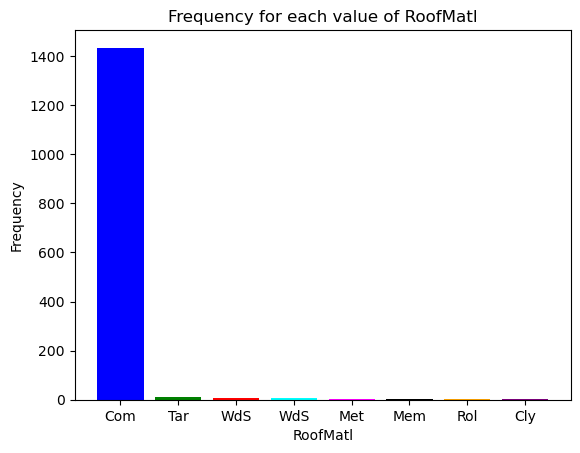

In [106]:
# Plotando a frequencia dos valores
plot_categorical(df,'RoofMatl',True)

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

### Exterior1st

Atributo categórico que indica qual a cobertura externa da casa

In [107]:
ext = df.Exterior1st

In [108]:
# Verificando se temos valores NULOS
ext.isna().sum()

0

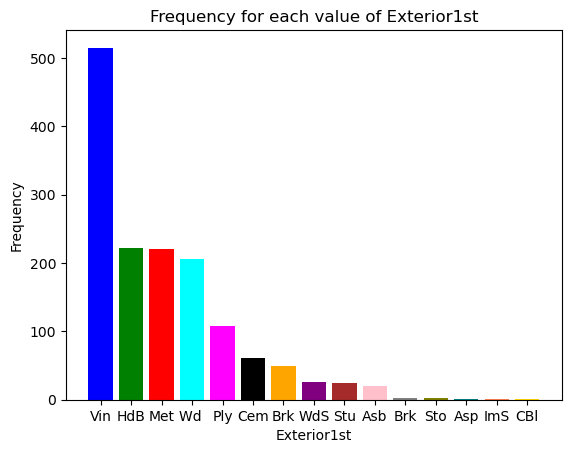

In [109]:
# Plotando a frequencia do atributo
plot_categorical(df,'Exterior1st',True)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [110]:
del ext

###  Exterior2st

Atributo categórico que serve como extensão do anterior, caso a cobertura seja feito a partir de mais de um material

In [111]:
ext = df.Exterior2nd

In [112]:
# Verificando se temos valores NULOS
ext.isna().sum()

0

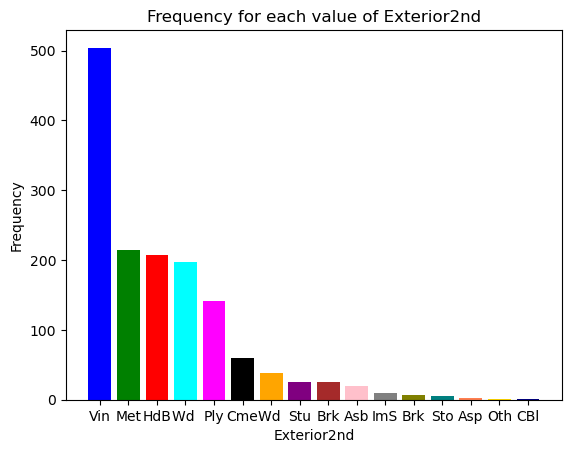

In [113]:
# Plotando a frequencia do atributo
plot_categorical(df,'Exterior2nd',True)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [114]:
del ext

### MasVnrType

Um atributo categórico que representa o tipo de alvenaria utilizado

In [115]:
mas = df.MasVnrType

In [116]:
# Verificando se temos algum valor NULO
mas.isna().sum()

8

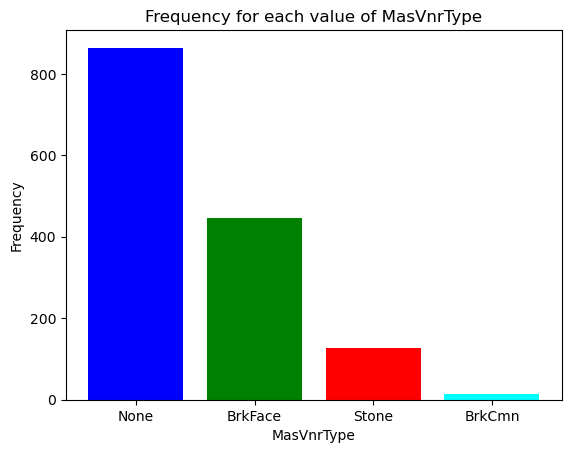

In [117]:
# Plotando a frequencia de cada valor
plot_categorical(df,'MasVnrType')

É interessante ressaltar que este None é um valor válido para este atributo, pois indicar que não há alvenaria na propriedade

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone


In [118]:
del mas

### MasVnrArea

Atributo numérico que indicar a area de alvenaria presente na propriedade

In [119]:
mas = df.MasVnrArea

In [120]:
# Verificando se temos algum valor NULO
mas.isna().sum()

8

Interessante pensar que os mesmos 8 valores nulos para este atributo são os mesmo 8 valores NULOS para o atributo anterior

In [121]:
numeric_eda(mas)

A media eh : 103.68526170798899
O maximo eh : 1600.0
O minimo eh : 0.0


Além, disso é interessante pensar que caso Não haja alvenaria, ou seja, o valor do atributo anterior for None, então a área será 0, entao o esperado é que a densidade ao redor do ponto 0 seja alta

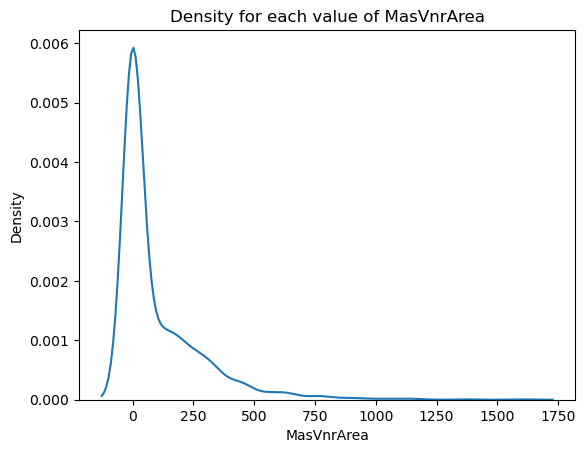

In [122]:
plot_numeric(df,'MasVnrArea')

In [123]:
del mas

### ExterQual

Um atributo categórico ordinal, que será futuramente transformado para valor numérico já que possui uma clara ordem entre seus valores, os valores irão de 1 à 5, sendo 5 o melhor. Este atributo avalia a qualidade do material no exterior da casa.

In [124]:
ext = df.ExterQual

In [125]:
# Verificando se temos algum valor NULO
ext.isna().sum()

0

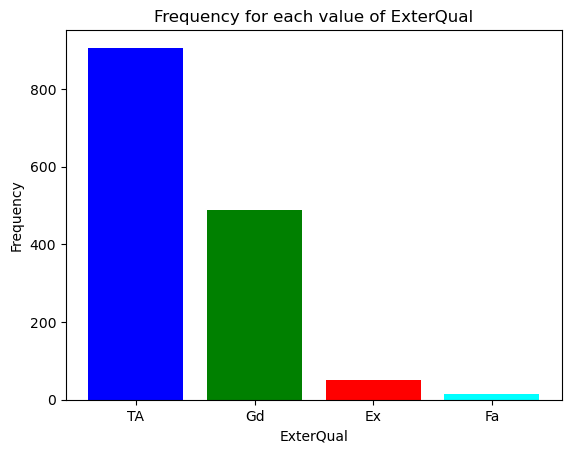

In [126]:
# Plotando a frequencia dos valores
plot_categorical(df,'ExterQual')

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Acima, podemos verificar que não há a presença do valor 'Poor', mas ele deve ser levado em consideração, caso em algum momento exista.

In [127]:
del ext

### ExterCond:

Um atributo categórico ordinal, que será futuramente transformado para valor numérico já que possui uma clara ordem entre seus valores, os valores irão de 1 à 5, sendo 5 o melhor. Este atributo avalia a condição do material no exterior da casa.

In [128]:
ext = df.ExterCond

In [129]:
# Verificando se temos algum valor NULO
ext.isna().sum()

0

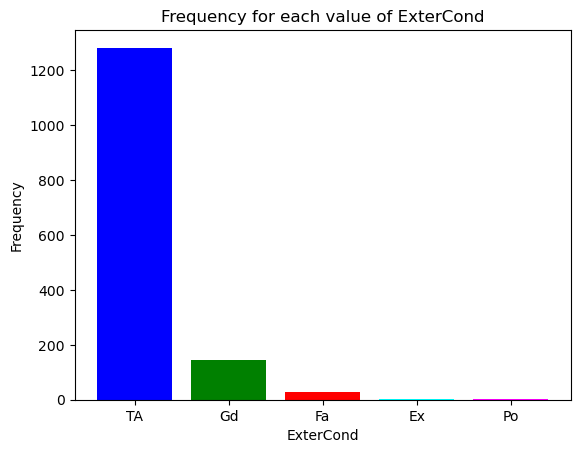

In [130]:
# Plotando a frequencia dos valores
plot_categorical(df,'ExterCond')

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

### Foundation

Atributo categórico que representa o tipo de fundação da propriedade, assumindo vários valores

In [131]:
found = df.Foundation

In [132]:
# Verificando se temos algum valor NULO
found.isna().sum()

0

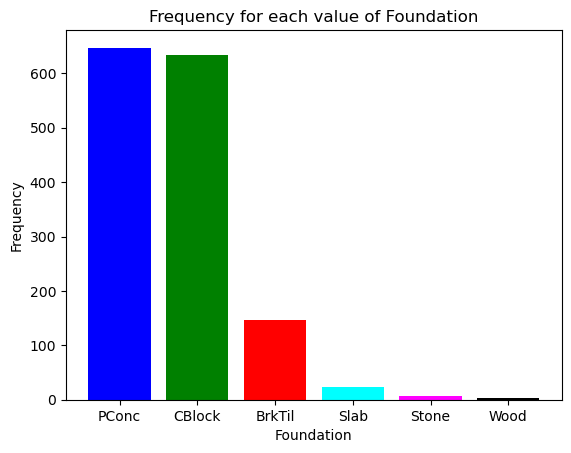

In [133]:
# PLotando a frequencia dos valores
plot_categorical(df,'Foundation')

       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

In [134]:
del found

### BsmtQual

Atributo categórico ordinal, que representa a altura do porão de propriedade, logo, no futuro podemos apenas transformar-los em valores numéricos, já que existe uma clara ordem entre eles.

In [135]:
bmst = df.BsmtQual

In [136]:
# Verificando se temos algum valor NULO
bmst.isna().sum()

37

Isso acontece caso não haja porão na propriedade, assim, é interessante lidarmos com esta ideia de alguma maneira, para levar em conta propriedades que não contém porão

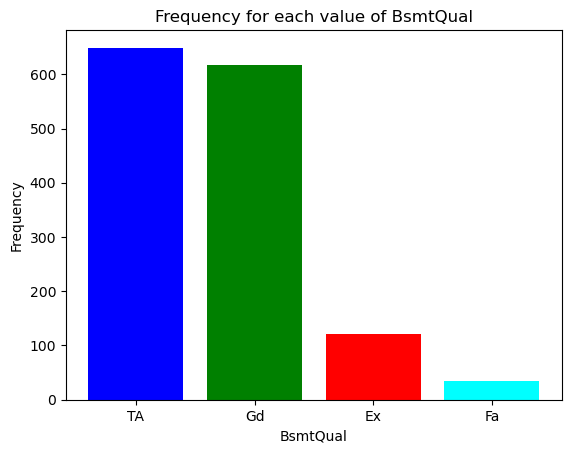

In [137]:
# PLotando a frequencia dos valores
plot_categorical(df,'BsmtQual')

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [138]:
del bmst

### BsmtCond

Muito semelhante ao atributo anterior, mas avalia a condição geral do porão, de maneira ordinal também.

In [139]:
bmst = df.BsmtCond

In [140]:
# Verificando se temos algum valor NULO
bmst.isna().sum()

37

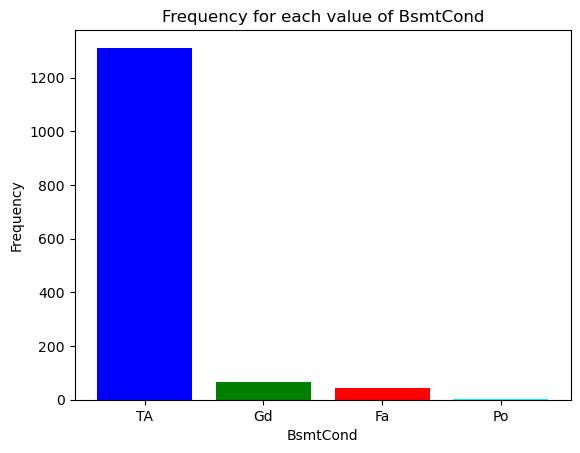

In [141]:
# PLotando a frequencia dos valores
plot_categorical(df,'BsmtCond')

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [142]:
del bmst

### BsmtExposure

Semelhante aos atributos anteriores, e se refere as paredes do porão

In [143]:
bmst = df.BsmtExposure

In [144]:
# Verificando se temos algum valor NULO
bmst.isna().sum()

38

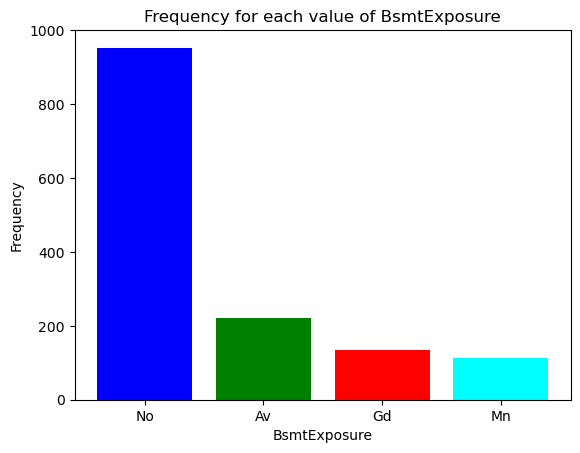

In [145]:
# PLotando a frequencia dos valores
plot_categorical(df,'BsmtExposure')

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

### BsmtFinType1

Atributo categórico ordinal, que da um rating para a área finalizada do porão

In [146]:
bmst = df.BsmtFinType1

In [147]:
# Verificando se temos algum valor NULO
bmst.isna().sum()

37

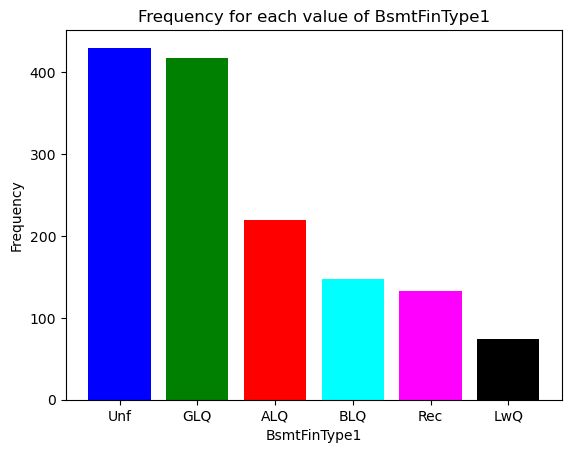

In [148]:
# PLotando a frequencia dos valores
plot_categorical(df,'BsmtFinType1')

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

### BsmtFinSF1

Área em pés da região finalizada do tipo 1, ou seja, atributo acima. Este atributo é numérico.

In [149]:
bsmt = df.BsmtFinSF1

In [150]:
# Verificando se temos algum valor NULO
bsmt.isna().sum()

0

In [151]:
numeric_eda(bsmt)

A media eh : 443.6397260273973
O maximo eh : 5644
O minimo eh : 0


Podemos compreender que o valor de 0, seria referente caso não houvesse finalização da região do porão,mas também no nosso conjunto de dados,caso não haja porão, ele trata o valor como zero, o que é aceitável, visto que não a área alguma.

In [152]:
df[df.BsmtFinSF1 == 0]['BsmtFinType1'].isna().sum()

37

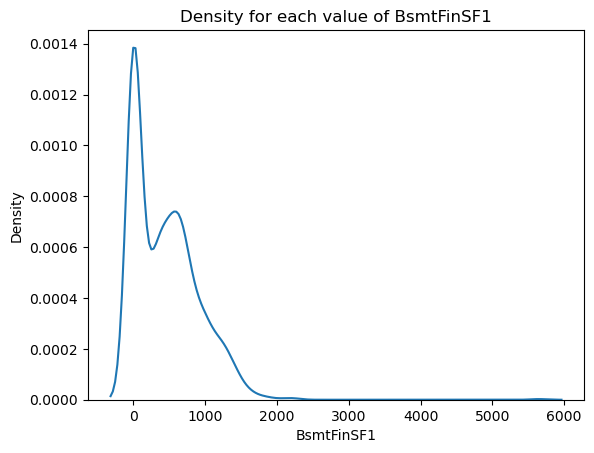

In [153]:
plot_numeric(df,'BsmtFinSF1')

Isto era esperado, já que a maioria dos porões ainda não foram finalizado, cmo foi visto no atributo anterior.

In [154]:
del bsmt

### BsmtFinType2

Atributo categórico ordinal, que da um rating para a área finalizada do porão, caso haja mais de uma

In [155]:
bmst = df.BsmtFinType2

In [156]:
# Verificando se temos algum valor NULO
bmst.isna().sum()

38

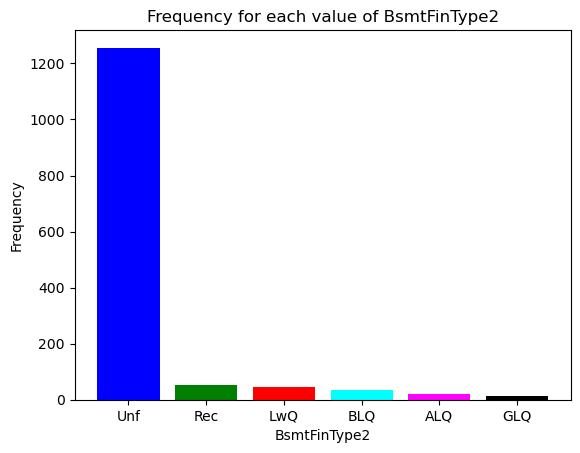

In [157]:
# PLotando a frequencia dos valores
plot_categorical(df,'BsmtFinType2')

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [158]:
del bmst

### BsmtFinSF2

Área em pés da região finalizada do tipo 2, ou seja, atributo acima. Este atributo é numérico.

In [159]:
bsmt = df.BsmtFinSF2

In [160]:
# Verificando se temos algum valor NULO
bsmt.isna().sum()

0

In [161]:
numeric_eda(bsmt)

A media eh : 46.54931506849315
O maximo eh : 1474
O minimo eh : 0


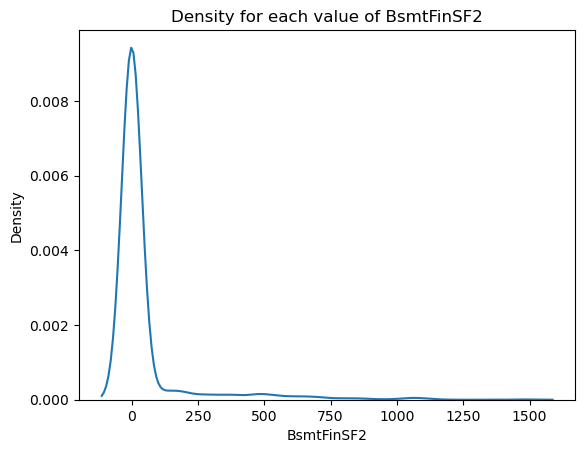

In [162]:
plot_numeric(df,'BsmtFinSF2')

Isto era esperado, já que a maioria dos porões ainda não foram finalizado, cmo foi visto no atributo anterior.

### BsmtUnfSF

Area do porão que ainda nao foi finalizada, caso o porão nao exista este valor será 0.

In [163]:
bsmt = df.BsmtUnfSF

In [164]:
# Verificando se temos algum valor NULO
bsmt.isna().sum()

0

In [165]:
df[df.BsmtUnfSF == 0]['BsmtFinType1'].isna().sum()

37

In [166]:
numeric_eda(bsmt)

A media eh : 567.2404109589041
O maximo eh : 2336
O minimo eh : 0


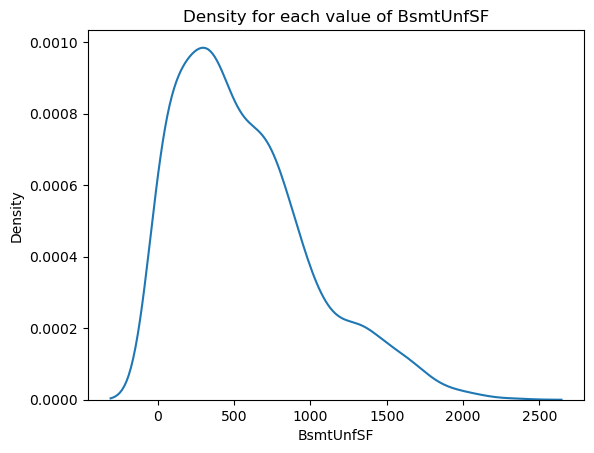

In [167]:
plot_numeric(df,'BsmtUnfSF')

In [168]:
del bsmt

### TotalBsmtSF

Este atributo é numérico e representa a área total do porão, mesmo que ele ainda nao tenha sido finalizado.

In [169]:
bsmt = df.TotalBsmtSF

In [170]:
# Verificando se temos algum valor NULO
bsmt.isna().sum()

0

In [171]:
# Caso o porão nao existe ele terá valor zero
df[df.TotalBsmtSF == 0]['BsmtFinType1'].isna().sum()

37

In [172]:
# Caso o porão nao tenha sido finalizado, o seu valor não é zero
df[ (df['BsmtFinType1'] == 'Unf') & (df['TotalBsmtSF'] == 0)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [173]:
numeric_eda(bsmt)

A media eh : 1057.4294520547944
O maximo eh : 6110
O minimo eh : 0


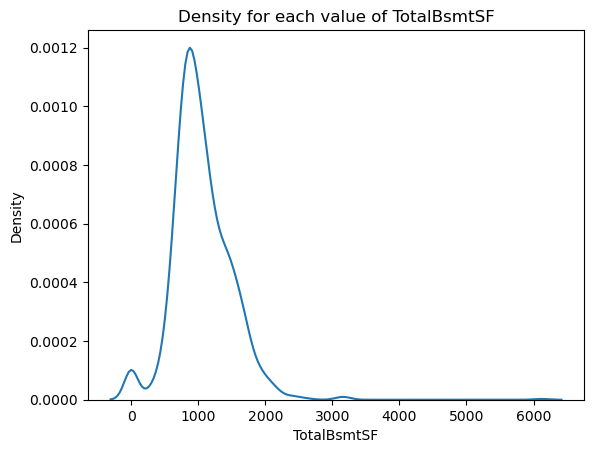

In [174]:
plot_numeric(df,'TotalBsmtSF')

In [175]:
del bsmt

### Heating

Este atributo é um atributo categórico não ordinal, que representa os tipos de aquecimento da propriedade

In [176]:
heat = df.Heating

In [177]:
# Verificando se temos valores NULOS
heat.isna().sum()

0

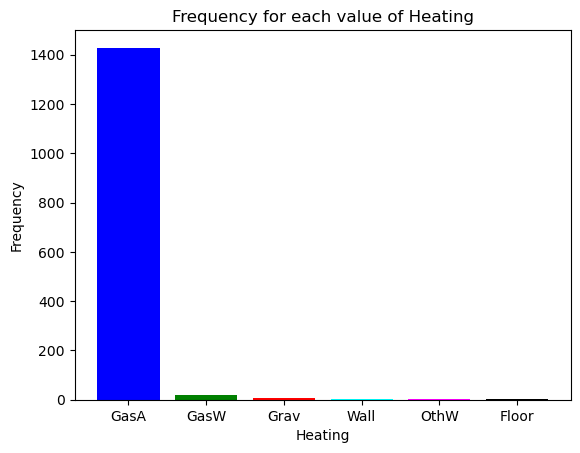

In [178]:
# Verificando a frequencia dos valores
plot_categorical(df,'Heating')

       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

In [179]:
del heat

### HeatingQC

Atributo categórico ordinal, que representa a qualidade e a condição do equipamento de aquecimento de uma propriedade.

In [180]:
heat = df.HeatingQC

In [181]:
# Verificando se temos valores NULOS
heat.isna().sum()

0

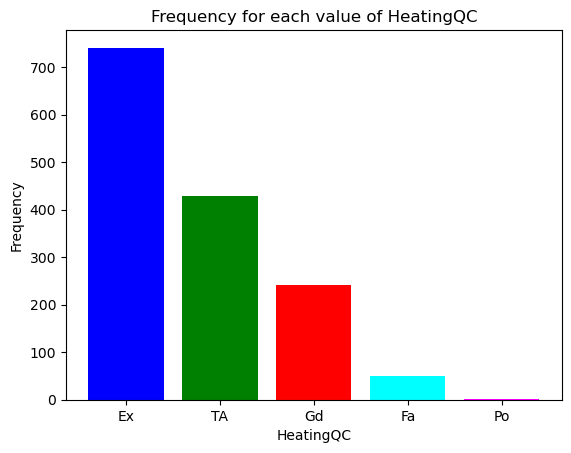

In [182]:
# Verificando a frequencia dos valores
plot_categorical(df,'HeatingQC')

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [183]:
del heat

### CentralAir

Atributo binário, que verifica a existência de um ar condicionado central, que pode ser controlado de um painel, algo muito comum na maioria das casas dos EUA

In [184]:
air = df.CentralAir

In [185]:
air.isna().sum()

0

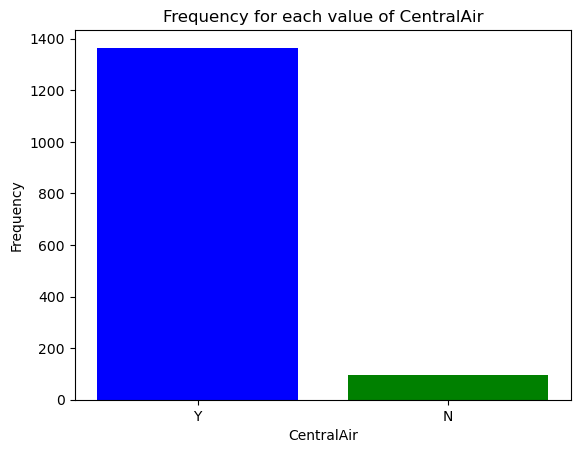

In [186]:
plot_categorical(df,'CentralAir')

Como podemos perceber, é muito comum a maioria das propriedaes serem equipadas com este sistema. Felizmente, podemos apenas transformar os valores para 0 e 1 para lidar com este atributo, algo bem simples.

In [187]:
del air

### Electrical

Atributo categórico que indica o sistema de eletricidade que a propriedade utiliza, este atributo não possui ordem em seus valores e deve ser tratado como um atirbuto categórico comum.

In [188]:
elet = df.Electrical

In [189]:
# Vamos verificar se temos algum valor nulo
elet.isna().sum()

1

É interessante entender por que existe este valor nulo, verificando as outras variáveis, para entenderemos com isto funciona.

In [190]:
df[df.Electrical.isna()].Utilities

1379    AllPub
Name: Utilities, dtype: object

Podemos verificar que esta propriedade possui todas as utilidades básicas, incluindo eletricidade, logo é necessário que ela tenha um sistema de eletricidade. Assim precisamos inserir algum valor para este objeto. Uma possível ideia é inserir a MODA deste atributo para os valores que tem todas as UTILIDADES.

In [191]:
df[(df.Electrical.isna() == False) & (df.Utilities == 'AllPub')].Electrical.mode()

0    SBrkr
Name: Electrical, dtype: object

Assim, na hora do pré-processamento esse valor será atributo para este objeto.

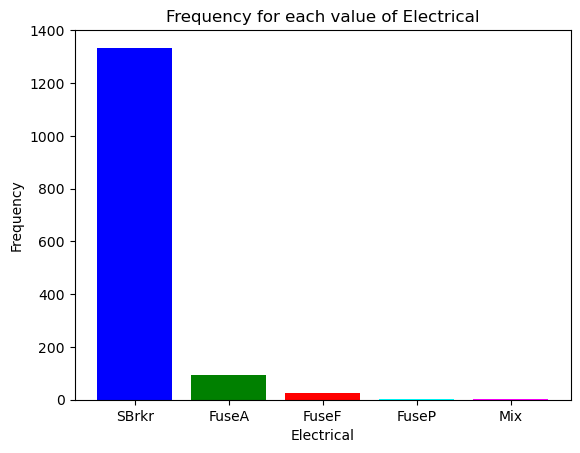

In [192]:
plot_categorical(df,'Electrical')

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [193]:
del elet

### 1stFlrSF

Atributo numérico que indica a area em pés do primeiro andar da propriedade

In [194]:
flr = df['1stFlrSF']

In [195]:
# Vamos verificar se temos algum valor NULO
flr.isna().sum()

0

In [196]:
numeric_eda(flr)

A media eh : 1162.626712328767
O maximo eh : 4692
O minimo eh : 334


É interessante entender que não é possível que uma propriedade tenha zero como área, já que é importante que a propriedade exista

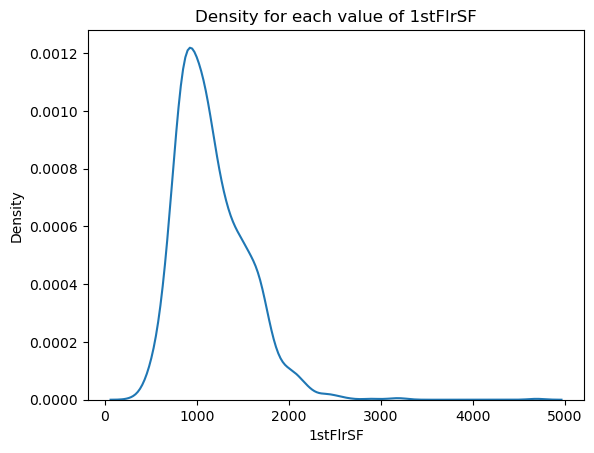

In [197]:
plot_numeric(df,'1stFlrSF')

In [198]:
del flr

### 2ndFlrSF

Atributo numérico que indica a area em pés do segundo andar da propriedade

In [199]:
flr = df['2ndFlrSF']

In [200]:
# Vamos verificar se temos algum valor NULO
flr.isna().sum()

0

In [201]:
numeric_eda(flr)

A media eh : 346.99246575342465
O maximo eh : 2065
O minimo eh : 0


Nesse caso podemos ter uma área igual a zero, no caso que a propriedade não tenha um segundo andaar

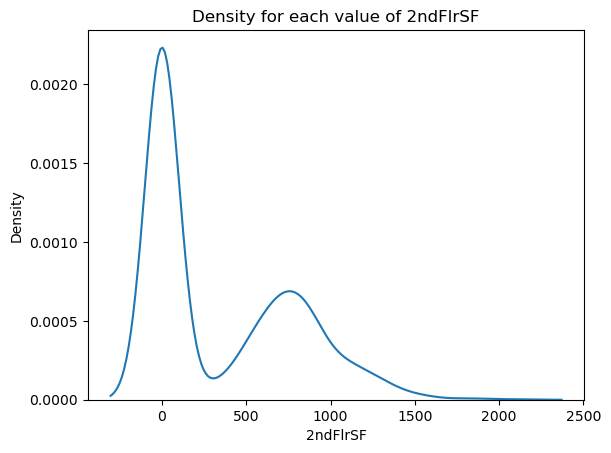

In [202]:
plot_numeric(df,'2ndFlrSF')

### LowQualFinSF

Este atributo é numérico e representa a área da propriedade que não foi finalizada corretamente, ou seja com baixa qualidade

In [203]:
qual = df.LowQualFinSF

In [204]:
# Vamos verificar se temos algum valor NULO
qual.isna().sum()

0

In [205]:
numeric_eda(qual)

A media eh : 5.844520547945206
O maximo eh : 572
O minimo eh : 0


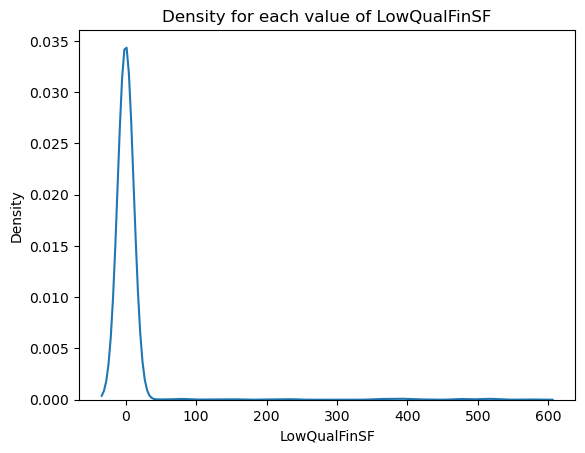

In [206]:
plot_numeric(df,'LowQualFinSF')

Podemos entender que este atributo não contém valores tão grandes pelo fato de, caso for muito grande, siginifca que a propriedade inteira é de baixa qualidade, o que é bem problemático.

In [207]:
del qual

### GrLivArea

Atributo numérico que representa a área da propriedade que está em boa qualidade

In [208]:
qual = df.GrLivArea

In [209]:
# Vamos verificar se temos algum valor NULO
qual.isna().sum()

0

In [210]:
numeric_eda(qual)

A media eh : 1515.463698630137
O maximo eh : 5642
O minimo eh : 334


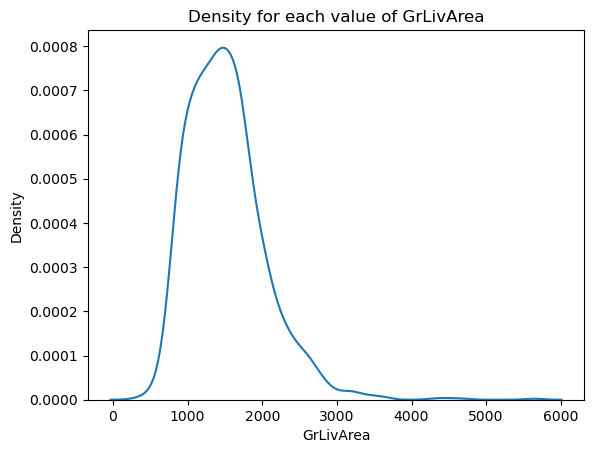

In [211]:
plot_numeric(df,'GrLivArea')

In [212]:
del qual

### BsmtFullBath

Atributo numérico que representa a quantidade de banheiro completos (com chuveiro) que se tém no porão

In [213]:
bsmt = df.BsmtFullBath

In [214]:
# Verificando se temos valores NULOS
bsmt.isna().sum()

0

In [215]:
numeric_eda(bsmt)

A media eh : 0.42534246575342466
O maximo eh : 3
O minimo eh : 0


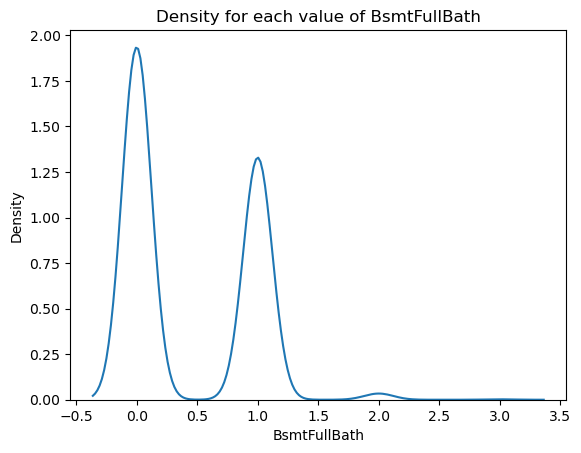

In [216]:
plot_numeric(df,'BsmtFullBath')

Podemos percebe densidades grandes em numeros inteiros, visto que é impossível existe 0.5 banheiros. Além disso, percebe-se que a maioria dos porões tem 0 ou 1 banheiros completos.

In [217]:
del bsmt

### BsmtHalfBath

Atributo numérico que representa a quantidade de banheiro não completos (sem chuveiro) que se tém no porão

In [218]:
bsmt = df.BsmtHalfBath

In [219]:
# Verificando se temos valores NULOS
bsmt.isna().sum()

0

In [220]:
numeric_eda(bsmt)

A media eh : 0.057534246575342465
O maximo eh : 2
O minimo eh : 0


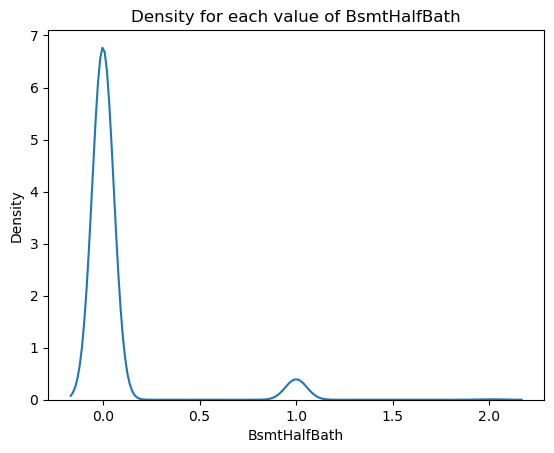

In [221]:
plot_numeric(df,'BsmtHalfBath')

Bem similar ao atributo anterior, mas desta vez, a maioria dos porões não tem banheiros não completos.

### FullBath

Este é um atributo numérico que representa a quantidade de banheiros completos na propriedade sem contar os banheiros que tem no porão

In [222]:
bath = df.FullBath

In [223]:
# Vamos verificar se temos valores NULOS
bath.isna().sum()

0

In [224]:
numeric_eda(bath)

A media eh : 1.5650684931506849
O maximo eh : 3
O minimo eh : 0


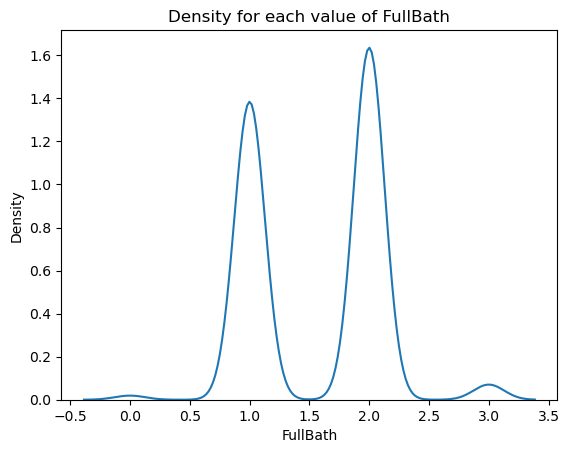

In [225]:
plot_numeric(df,'FullBath')

Podemos compreender, que a maioria das propriedades tem pelo menos 1 banheiro, o que já era esperado, visto que é essencial a existência de um banheiro.

In [226]:
del bath

### HalfBath

Este é um atributo numérico que representa a quantidade de banheiros não completos na propriedade sem contar os banheiros que tem no porão

In [227]:
bath = df.HalfBath

In [228]:
# Vamos verificar se temos valores NULOS
bath.isna().sum()

0

In [229]:
numeric_eda(bath)

A media eh : 0.38287671232876713
O maximo eh : 2
O minimo eh : 0


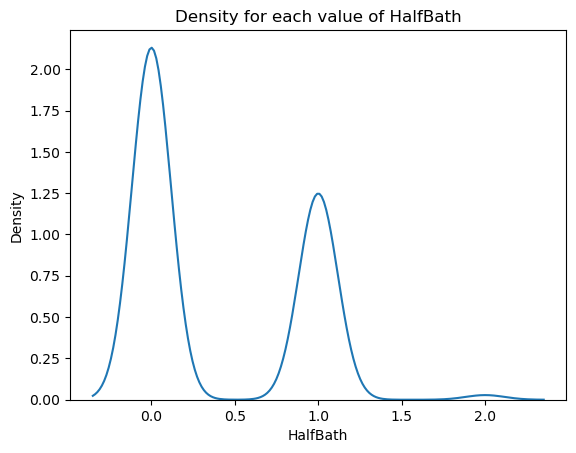

In [230]:
plot_numeric(df,'HalfBath')

In [231]:
del bath

### BedroomAbvGr

Atributo numérico que representa a quantidade de quartos que tem na propriedade excluindo os quartos localizados no porão.

In [232]:
bedr = df.BedroomAbvGr

In [233]:
# Verficiadno se temos valores NULOS
bedr.isna().sum()

0

In [234]:
# Verificando algumas características do atributi
numeric_eda(bedr)

A media eh : 2.8664383561643834
O maximo eh : 8
O minimo eh : 0


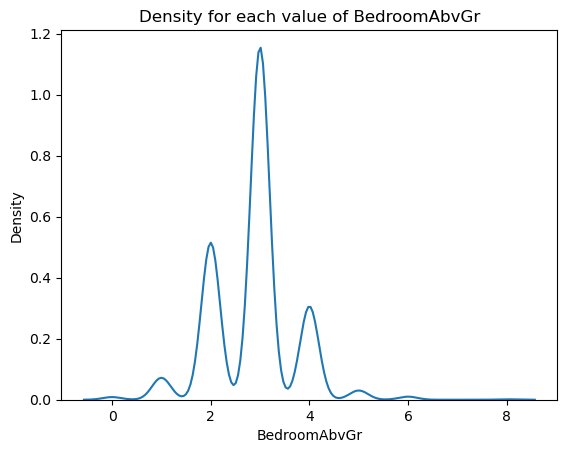

In [235]:
plot_numeric(df,'BedroomAbvGr')

A maioria das propriedades tem 3 quartos, e poucas tem um quarto, meio que nichando um pouco as nossas propriedades para propriedades maiores

In [236]:
del bedr

### KitchenAbvGr

Atributo numérico que indicar quantas cozinhas temos na propriedades em questão

In [237]:
kit = df.KitchenAbvGr

In [238]:
# Vamos verificar se temos valores NULOS
kit.isna().sum()

0

In [239]:
# Analisar algumas propriedades dos dados
numeric_eda(kit)

A media eh : 1.0465753424657533
O maximo eh : 3
O minimo eh : 0


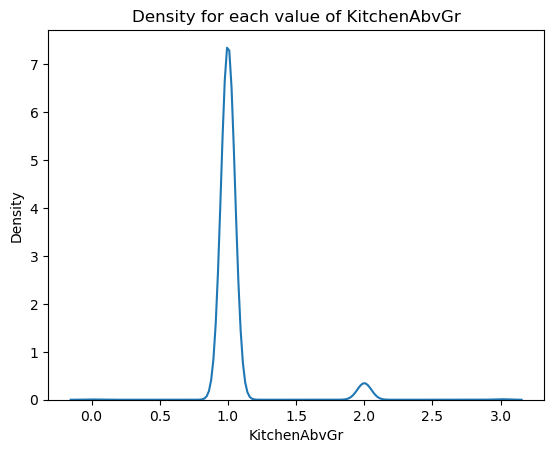

In [240]:
plot_numeric(df,'KitchenAbvGr'
            )

In [241]:
del kit

### KitchenQual

Atributo categórico ordinal que representa em qual estado a cozinha se encontra de qualidade de convervação e de utensílios

In [242]:
kit = df.KitchenQual

In [243]:
# Vamos verificar se temos valores NULOS
kit.isna().sum()

0

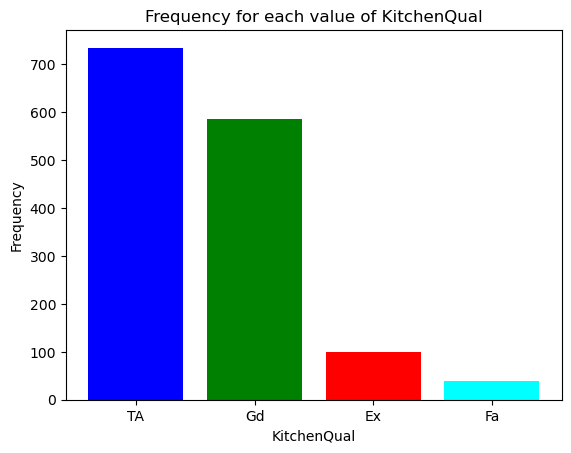

In [244]:
plot_categorical(df,'KitchenQual')


       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

Importante ressaltar que mesmo não tendo o valor "Poor", isto deve ser levado em consideração durante o nosso pré-processamento. Felizmente este atributo é ordinal, o que facilita bastante a transformação.

### TotRmsAbvGrd

Atributo numérico que indicar a quantidade total de quartos, não incluindo banheiros

In [245]:
rms = df.TotRmsAbvGrd

In [246]:
# Vericiando se temos valores NULOS
rms.isna().sum()

0

In [247]:
# Verificando algumas propriedades dos dados
numeric_eda(rms)

A media eh : 6.517808219178082
O maximo eh : 14
O minimo eh : 2


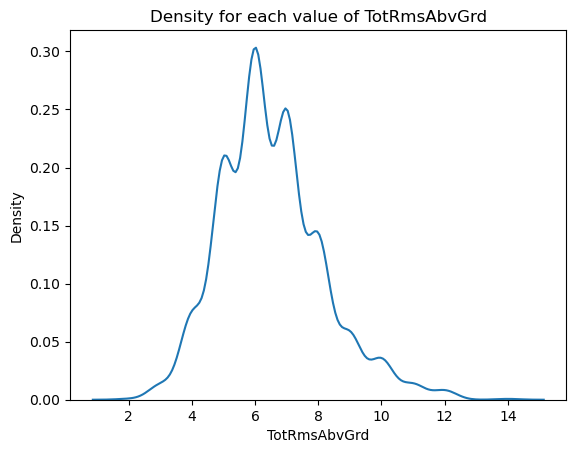

In [248]:
plot_numeric(df,'TotRmsAbvGrd')

In [249]:
del rms

###  Functional

Atributo categórico ordinal que representa a funcionalidade da casa, ou seja como ela funciona, geralmente será typical Funcionallity, indicando que funciona normalmente

In [250]:
func = df.Functional

In [251]:
# Vamos verificar se temos algum valor NULO
func.isna().sum()

0

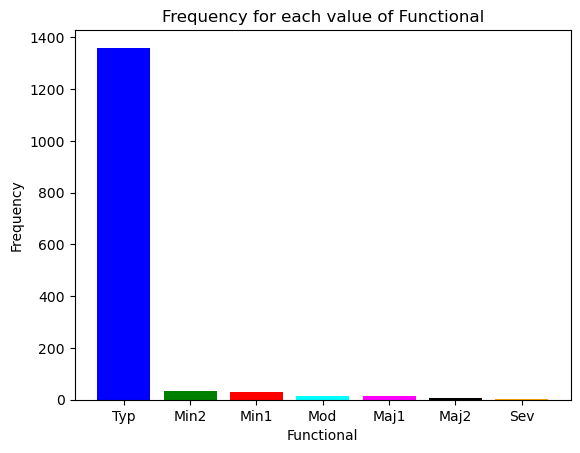

In [252]:
# Verificando a frequencia de cada valor
plot_categorical(df,'Functional')

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only


### Fireplaces

Atributo numérico que representa a quantidade de lareiras que tem na casa

In [253]:
fire = df.Fireplaces

In [254]:
# Verificnado se temos valores NULOS
fire.isna().sum()

0

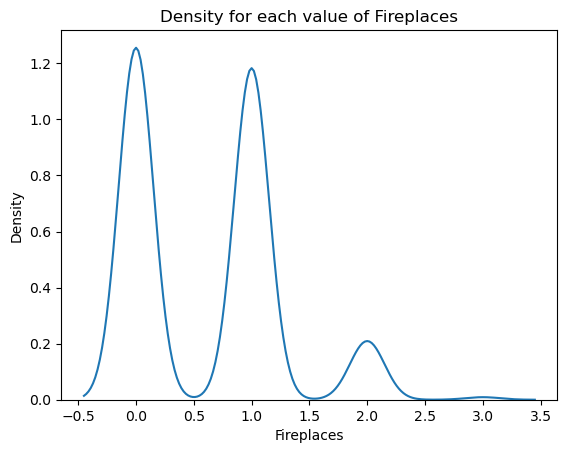

In [255]:
# Vamos verificiar algumas propriedades dos dados
plot_numeric(df,'Fireplaces')

### FireplaceQu

Este atributo é categórico ordinal e representa a qualidade da lareira que se tem na casa. É importante ressaltar que caso não haja lareira o valor será NULO, logo é interessante explorar alguma possibilidade para lidar com isto.

In [256]:
fire = df.FireplaceQu

In [257]:
# Vamos verificar a existências de valores NULOS
fire.isna().sum()

690

Como podemos verificar, temos bastante valores nulos, o que é um grande problema. Uma estratégia para lidar com isso pode ser a remoção do atributo, já que ele depende do atributo anterior, podendo ter uma relação de causalidade, mas que não pode ser pressumida sem provas

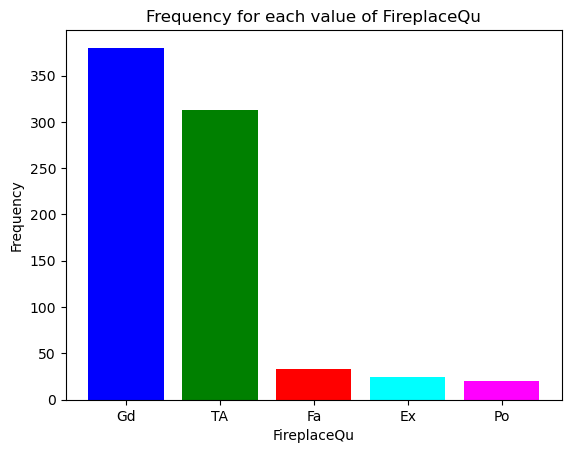

In [258]:
plot_categorical(df,'FireplaceQu')

In [259]:
del fire

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

### GarageType

Este é um atributo categórico nominal, que representa a localização da garagem.

In [260]:
gar = df.GarageType

In [261]:
# Vamos verificar se temos alguns valores NULOS
gar.isna().sum()

81

Caso não haja garagem o valor é NULO, e para tratar disto, como realizaremos uma transformação para valores numéricos, podemos apenas deixar como zero para evitar qualquer problema.

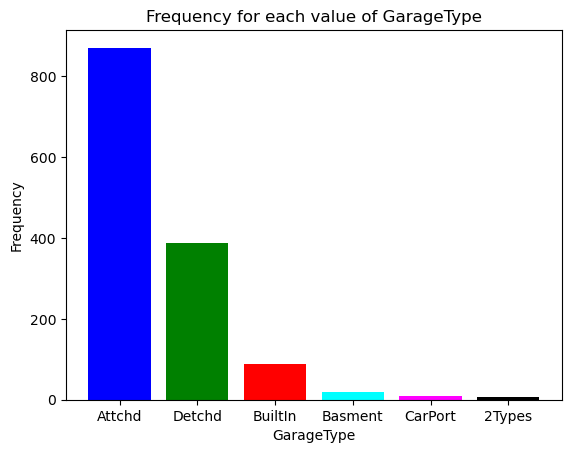

In [262]:
plot_categorical(df,'GarageType')

In [263]:
del gar

       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

### GarageYrBlt

Atributo numérico que representa o ano de construção da garagem, semelhantemente a todos os outros atributos deste tipo, iremos substituir para a "idade" da garagem.

In [264]:
gar = df.GarageYrBlt

In [265]:
# Vamos verificar se temos valores NULOS
gar.isna().sum()

81

Semelhantemente ao atributo anterior, caso a a garagem não existe recebe o valor NULO. Para lidar com isto teriámos um problema, já que provavelmente a relação "ano de construção" x "preço" tem uma correlação negativa, logo se colocássemos 0 como valor, poderíamos estar criando uma tendência para propriedades sem garagem. Assim, uma ideia interessante é verificar a relação entre ano de construção da propriedade e da garagem.

In [266]:
df[(df['GarageYrBlt'].isna() == False) & (df['YearBuilt'] != df['GarageYrBlt'])][['YearBuilt','GarageYrBlt']]

,YearBuilt,GarageYrBlt
3,1915,1998.0
15,1929,1991.0
26,1951,2005.0
27,2007,2008.0
29,1927,1920.0
...,...,...
1432,1927,1928.0
1436,1971,1974.0
1440,1922,1993.0
1445,1966,1990.0


Podemos verificar que temos 290 propriedades que construíram o prédio e somente depois a garagem. POrém podemos botar um limitante de 10 anos para cima.

In [267]:
df[(df['GarageYrBlt'].isna() == False) & (df['YearBuilt'] != df['GarageYrBlt']) & (df['GarageYrBlt'] - df['YearBuilt'] > 10)][['YearBuilt','GarageYrBlt']]

,YearBuilt,GarageYrBlt
3,1915,1998.0
15,1929,1991.0
26,1951,2005.0
51,1934,1985.0
61,1920,1935.0
...,...,...
1424,1958,1970.0
1427,1945,1962.0
1440,1922,1993.0
1445,1966,1990.0


Caso, colocassémos uma marge de erro de 10 anos, podemos identificar que apenas 168 propriedades não tem garagem. Além disso, podemos verificar qual o intervalo de anos que esta tendência acontece.

In [268]:
df[(df['GarageYrBlt'].isna() == False) & (df['YearBuilt'] != df['GarageYrBlt']) & (df['GarageYrBlt'] - df['YearBuilt'] > 10)][['YearBuilt','GarageYrBlt']].max()

YearBuilt      1982.0
GarageYrBlt    2008.0
dtype: float64

Podemos identificar que apenas propriedades construídas antes de 1982 não seguem a tendência sugerida. Logo podemos verificar quantos valores sobrariam

In [269]:
df[(df['GarageYrBlt'].isna() == True) & (df['YearBuilt'] < 1982)]['YearBuilt'] 

39      1955
48      1920
78      1968
88      1915
99      1959
        ... 
1326    1931
1337    1941
1349    1872
1449    1970
1450    1974
Name: YearBuilt, Length: 73, dtype: int64

Sobrariam 73 dos 81. Para corrigir os 73 restante poderíamos apenas verificar a média de tempo que demorou para os prédios construírem as garagens e somar com o valor de construção do prédio que não tem garagem para podermos ter um valor

Para provármos que a relação se trata de uma correlação negativa podemos verificar o seguinte grafo

<Axes: xlabel='GarageYrBlt', ylabel='SalePrice'>

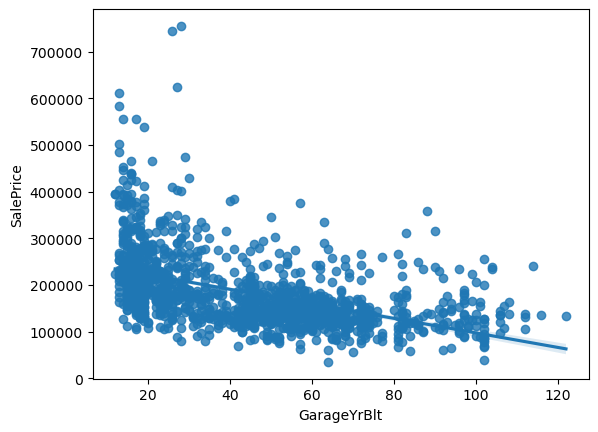

In [270]:
sns.regplot(x=2022 - df["GarageYrBlt"], y=df["SalePrice"])


Exatamente oque foi pensado, logo precisamos utilizar esta estratégia para este atributo

### GarageFinish

Atributo categórico ordinal, que representa a finalização da garagem, caso não existe será NULO, e para lidar com isso podemos atribuir zero ao objeto.

In [271]:
gar = df.GarageFinish

In [272]:
# Vamos verificar valores NULOS
gar.isna().sum()

81

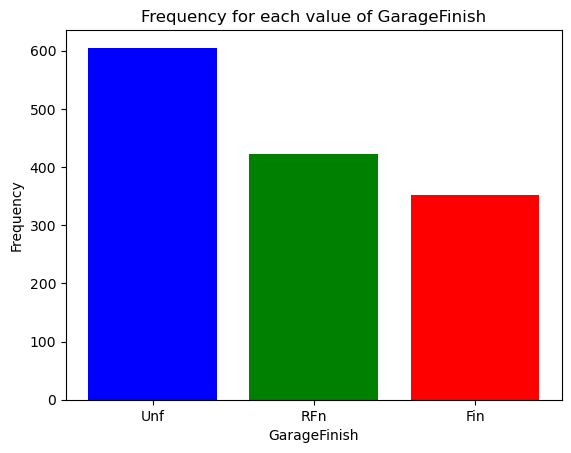

In [273]:
# Verificando a frequencia de cada valor
plot_categorical(df,'GarageFinish')

      Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

### GarageCars

Atributo numérico que representa a quantidade de carro que cabe dentro da garagem, caso ela não exista, o valor será zero

In [274]:
cars = df.GarageCars

In [275]:
# Vamos verificar se temos algum valor NULO
cars.isna().sum()

0

In [276]:
# Verificando algumas propriedades do atributo
numeric_eda(cars)

A media eh : 1.7671232876712328
O maximo eh : 4
O minimo eh : 0


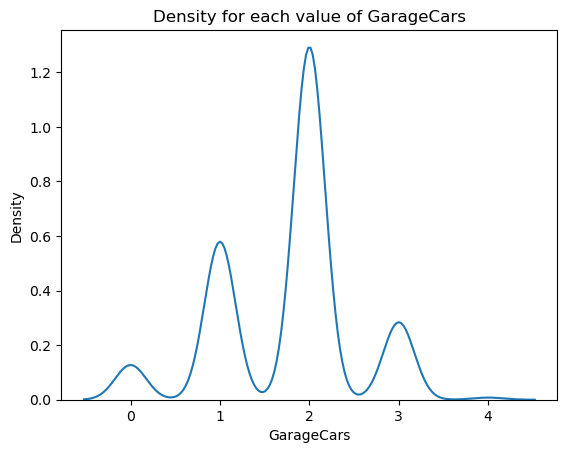

In [277]:
plot_numeric(df,'GarageCars')

In [278]:
del cars

### GarageArea

Atributo numérico que representa a área da garagem, caso ela não exista, o valor será 0

In [279]:
area = df.GarageArea

In [280]:
# Vamos verificar se temos algum valor NULO
area.isna().sum()

0

In [281]:
# Verificando algumas propriedades do atributo
numeric_eda(area)

A media eh : 472.9801369863014
O maximo eh : 1418
O minimo eh : 0


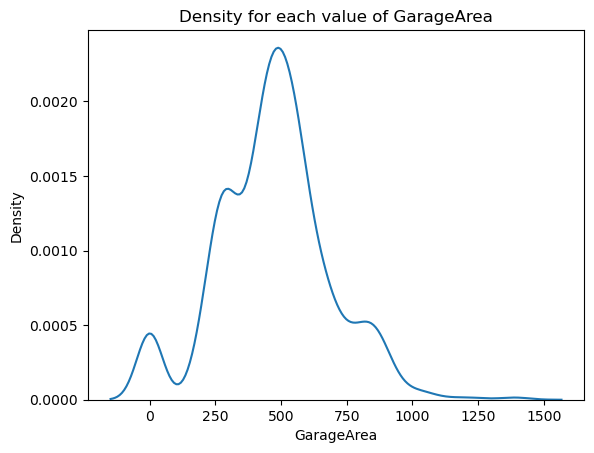

In [282]:
plot_numeric(df,'GarageArea')

In [283]:
del area

### GarageQual:

Atributo categórico ordinal que representa a qualidade da garagem. Caso não tenhamos uma garagem o valor será NULO

In [284]:
gar = df.GarageQual

In [285]:
# Vamos verificar se temos algum valor NULO
gar.isna().sum()

81

Uma possível estratégia para lidar com isto seria assumir que quando não se há garagem este fator nao é relevante, logo irá receber 0.

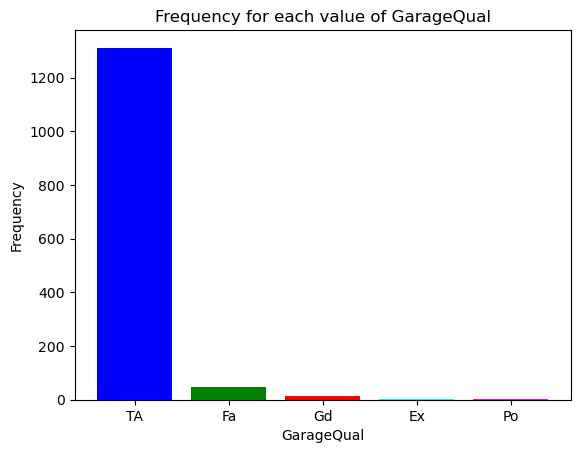

In [286]:
plot_categorical(df,'GarageQual')

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [287]:
del gar

### GarageCond

Atributo categórico ordinal que representa a condição da garagem. Caso não haja garagem será NULO, e para lidar com isto utilizaremos a mesma estratégia.

In [288]:
gar = df.GarageCond

In [289]:
# Vamos verificar se temos algum valor NULO
gar.isna().sum()

81

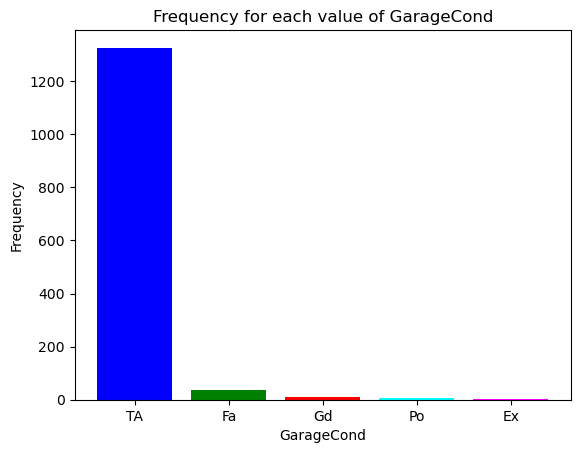

In [290]:
plot_categorical(df,'GarageCond')

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [291]:
del gar

### PavedDrive

Atributo categórico nominal, que representa a pavimentação da entrada da garagem.

In [292]:
pav = df.PavedDrive

In [293]:
# Vamos verificar se temos valores NULOS
pav.isna().sum()

0

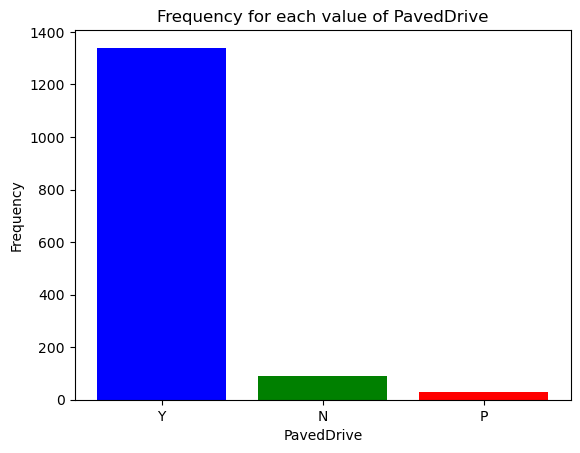

In [294]:
plot_categorical(df,'PavedDrive')

In [295]:
del pav


       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

### WoodDeckSF

Atributo numérico que indica a área do deck de maneira caso exista, caso não recebe 0

In [296]:
wood = df.WoodDeckSF

In [297]:
# Vamos verificar se temos valores NULOS
wood.isna().sum()

0

In [298]:
# Vamos verificar as propriedades do atributo
numeric_eda(wood)

A media eh : 94.2445205479452
O maximo eh : 857
O minimo eh : 0


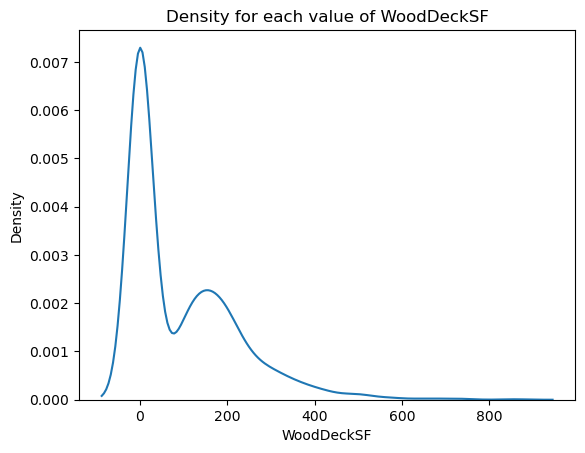

In [299]:
plot_numeric(df,'WoodDeckSF')

### OpenPorchSF

Atributo numérico que indica a área da "OPEN PORCH" da casa, que é tipo um gazebo

In [300]:
porch = df.OpenPorchSF

In [301]:
# Vamos verificar se temos valores NULOS
porch.isna().sum()

0

In [302]:
# Vamos verificar as propriedades do atributo
numeric_eda(porch)

A media eh : 46.66027397260274
O maximo eh : 547
O minimo eh : 0


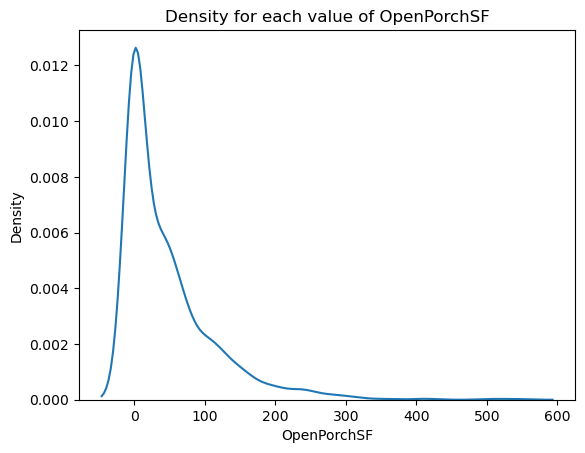

In [303]:
plot_numeric(df,'OpenPorchSF')

In [304]:
del porch

### Atributos de área de Porch

Temos mais alguns atributos que são referentes a área do porch da casa,e abaixo vamos apenas verificar se entre eles temos algum valor NULO

In [305]:
df.EnclosedPorch.isna().sum()

0

In [306]:
df['3SsnPorch'].isna().sum()

0

In [307]:
df.ScreenPorch.isna().sum()

0

Felizmente não temos valores NULOS, logo podemos prossseguir

### PoolArea

Atributo numérico que indica a área da piscina da propriedade, caso não haja piscina a área é 0

In [308]:
pool = df.PoolArea

In [309]:
# Vamos verificar se temos algum valor NULO
pool.isna().sum()

0

In [310]:
# Vamos verificar as propriedades do atributo
numeric_eda(pool)

A media eh : 2.758904109589041
O maximo eh : 738
O minimo eh : 0


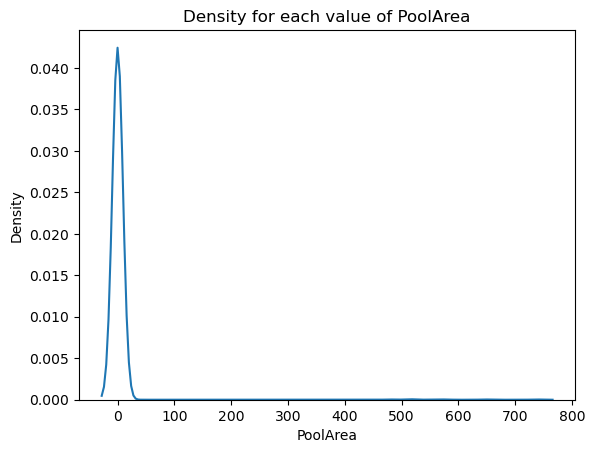

In [311]:
plot_numeric(df,'PoolArea')

In [312]:
df[df['PoolArea']>0]['SalePrice'].mean()

288138.5714285714

In [313]:
df[df['PoolArea'] == 0]['SalePrice'].mean()

180404.66345492084

Dessa maneira, neste conjunto de dados, apenas 7 casas tem piscina, o que meio que torna isto um fator muito interessante para valorizar o preço de uma casa

In [314]:
del pool

### PoolQC

Atributo categórico nominal que indica a qualidade da piscina, caso não exista o valor será NULO, logo é esperado que existam poucos valores não nulos

In [315]:
pool = df.PoolQC

In [316]:
# Vamos verificar a existência de valores NULOS
pool.isna().sum()

1453

Como esperado a maioria dos valores são nulos, logo neste caso, o atributo será removido futuramente pois, a maioria dos pontos tem o valor NULO, além disso podemos verificar como estão distribuidos

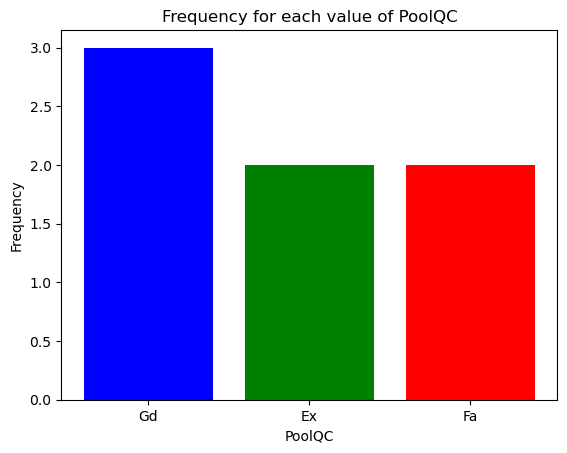

In [317]:
plot_categorical(df,'PoolQC')

A maioria das piscinas estão em boas condições, assim podemos remover este atributo pois ele seria algo muito trabalhoso de ser re-construído.

In [318]:
del pool

### Fence

Atributo categórico que pode assumir valors distintos, então não é interessante tratar como categórico nominal. Representa a qualidade da cerca da casa, se existir, mas é analisado em dois aspectos, logo devemos tratá-lo como categórico nominal.

In [319]:
fence = df.Fence

In [320]:
# Vamos verificar se temos valores NULOS
fence.isna().sum()

1179

Novamente, temos muitos valores nulos, e dessa maneira o atributo será removido da nossa análise para que nenhum tipo de problema ocorra.

### MiscFeature

Aqui tem items adicionais da propriedade que não puderam ser encaixados nos atributos anteriores. É um atributo categórico

In [321]:
misc = df.MiscFeature

In [322]:
# Vamos verificar se temos valores NULOS
misc.isna().sum()

1406

Como se trata de items adicionais, iremos atributos 0 para valores nulos e tratar este atributo como um categórico nominal simples, transformando os items em valores numéricos.

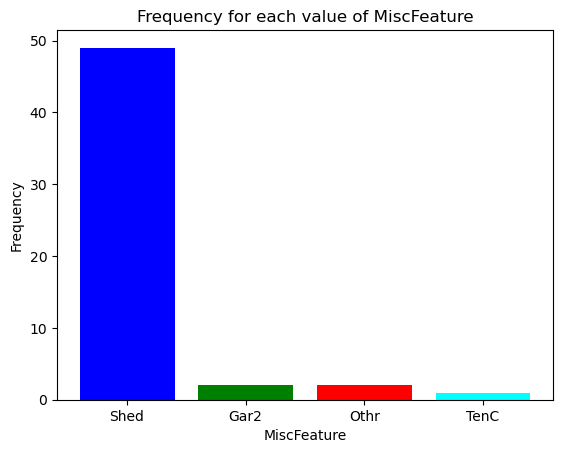

In [323]:
plot_categorical(df,'MiscFeature')

In [324]:
del misc

       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

### MiscVal

Atributo numérico que representa o valor dos itens adicionais da casa, caso não existam, será 0

In [325]:
misc = df.MiscVal

In [326]:
# Vamos verificar se temos valores NULOS
misc.isna().sum()

0

In [327]:
# Analisar tendencias
numeric_eda(misc)

A media eh : 43.489041095890414
O maximo eh : 15500
O minimo eh : 0


In [328]:
misc.var()

246138.0553972849

In [329]:
misc.std()

496.1230244579311

Isso representa o esperado, uma variância muito alta nos dados, gerado pela existências de items muito caros, e a ausências de itens.

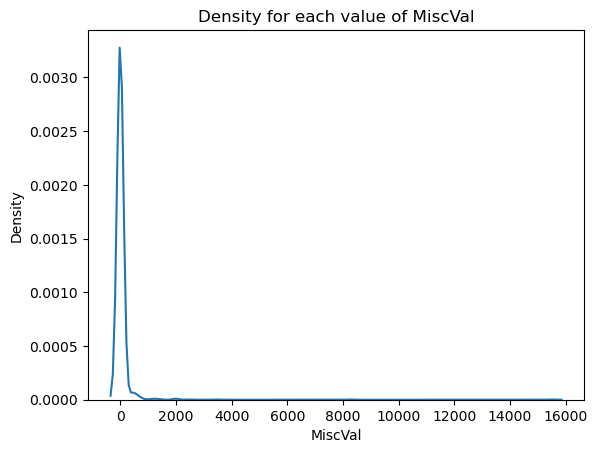

In [330]:
plot_numeric(df,'MiscVal')

In [331]:
del misc

### MoSold

Mês em que a casa foi vendida, um atributo numérico.

In [332]:
mes = df.MoSold

In [333]:
mes.isna().sum()

0

In [334]:
numeric_eda(mes)

A media eh : 6.321917808219178
O maximo eh : 12
O minimo eh : 1


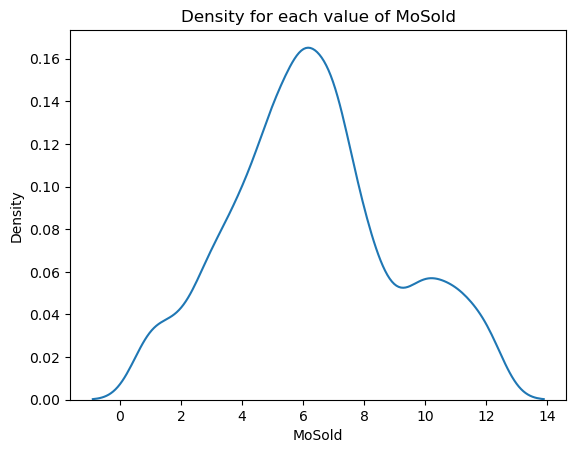

In [335]:
plot_numeric(df,'MoSold')

Vamos verificar se existe alguma correlação entre o Mes e preço, pois este atributo parece bem irrelevante, pois o mês repete todos os anos, e não é tão informativo

<Axes: xlabel='MoSold', ylabel='SalePrice'>

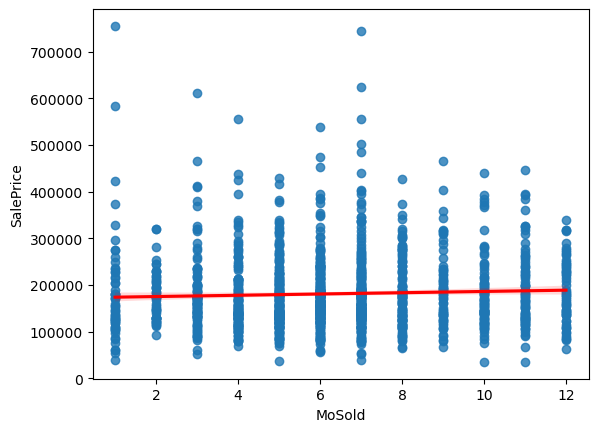

In [336]:
sns.regplot(x=df["MoSold"], y=df["SalePrice"],line_kws={'color':'red'})


Este atributo não é tão explicativo, pois o mês não é algo tão relevante, e desta maneira será removido.

In [337]:
del mes

### YrSold

A mesma coisa que o atributo anterior, mas representa o ano de vende da propriedade.

In [338]:
year = df.YrSold

In [339]:
# Vamos verificar se temos valores NULOS
year.isna().sum()

0

In [340]:
# Propriedades
numeric_eda(year)

A media eh : 2007.8157534246575
O maximo eh : 2010
O minimo eh : 2006


Podemos ver que estamos falando de valores bem recentes para as vendas destas propriedades, e novamente, como fizemos com todos os atributos que envolvem ano, iremos substituir o ano, pela quantidade de tempo que aconteceu o evento.

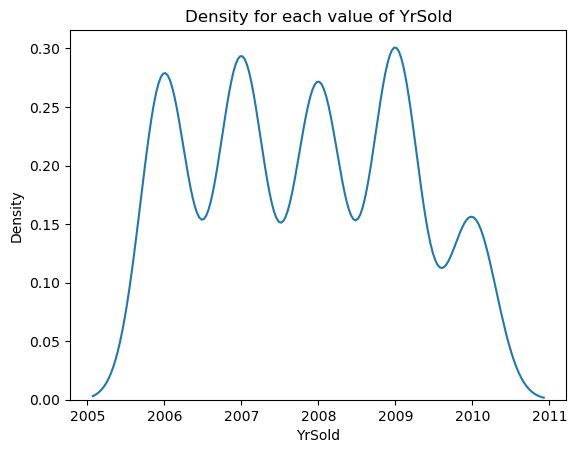

In [341]:
plot_numeric(df,'YrSold')

### SaleType

Como podemos verificar, nestes dados, todas as casas foram vendidas em algum momento entre 2006 e 2010, logo podemos obter o tipo de venda que foi feita, que é um atributo categórico nominal.

In [342]:
sal = df.SaleType

In [343]:
# Vamos verificar a existências de valores NULOS
sal.isna().sum()

0

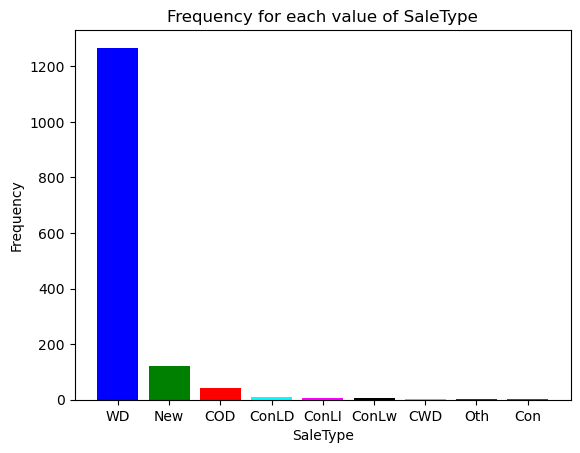

In [344]:
plot_categorical(df,'SaleType')

A maioria das vendas (quase 90%) foi realizada de maneira convencional, assim é necessário entender se há alguma relação do tipo de venda com o aumento de preço.

In [345]:
un = df['SaleType'].unique()

for i in un:
    print(f" A media para {i} eh {df[df['SaleType'] == i]['SalePrice'].mean()}")

 A media para WD eh 173401.8366219416
 A media para New eh 274945.41803278687
 A media para COD eh 143973.2558139535
 A media para ConLD eh 138780.88888888888
 A media para ConLI eh 200390.0
 A media para CWD eh 210600.0
 A media para ConLw eh 143700.0
 A media para Con eh 269600.0
 A media para Oth eh 119850.0


Pelo visto este atributo é relevante e deve ser mantido, e para pré-processa-lo podemos utilizar o encoder polinomial

In [346]:
del sal

       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		

### SaleCondition

Atributo categórico nominal que representa o tipo de venda que foi realizada da propriedade.

In [347]:
sal = df.SaleCondition

In [348]:
# Vamos verificar se temos valores NULOS
sal.isna().sum()

0

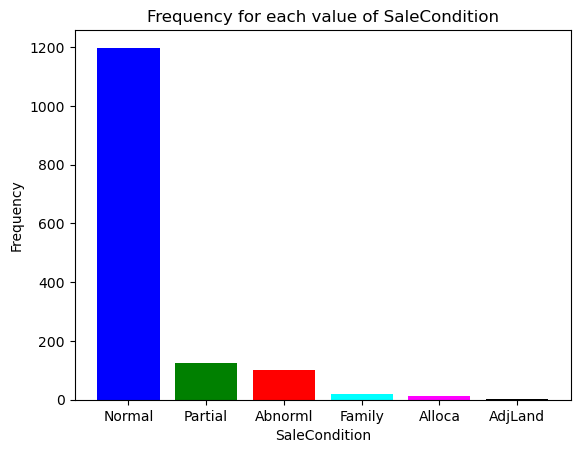

In [349]:
plot_categorical(df,'SaleCondition')

Novamente temos um tipo de condição que é predominante no nosso conjunto.


       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

## Pré-Processamento

Abaixo iremos tratar os valores NULOS e as incoêrencias do dataset

### Tratando valores NULOS e Categóricos ORDINAIS

In [350]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [351]:
# Remover o atributo ID

df.drop('Id',axis=1,inplace=True)

In [352]:
# Mapear atributo "Street" para binário
df['Street'] =  df['Street'].map({'Pave': 1, 'Grvl': 0})

In [353]:
# Remover o atributo Alley
df.drop('Alley',axis=1,inplace=True)

In [354]:
# Utilizar lable encoder (Categórico Ordinal)
df['LotShape'] =  df['LotShape'].map({'Reg': 3, 'IR1':2, 'IR2':1, 'IR3':0 })

In [355]:
# Utilizar label encoder (Categórico Ordinal)
df['Utilities'] =  df['Utilities'].map({'AllPub': 3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0 })

In [356]:
# Utilizar label encoder (Categórico Ordinal)
df['LandSlope'] =  df['LandSlope'].map({'Gtl': 2, 'Mod':1, 'Sev':0})

In [357]:
# Utilizar label encoder (Categórico Ordinal)
df['ExterQual'] =  df['ExterQual'].map({'Ex': 4, 'Gd':3, 'TA':2, 'Fa':1,'Po':0})

In [358]:
# Utilizar label encoder (Categórico Ordinal)
df['ExterCond'] =  df['ExterCond'].map({'Ex': 4, 'Gd':3, 'TA':2, 'Fa':1,'Po':0})

In [359]:
# Utilizar label encoder (Categórico Ordinal)
df['BsmtQual'] =  df['BsmtQual'].map({'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1})
df.BsmtQual.fillna(value=0,inplace=True)
df['BsmtQual'].isna().sum()

0

In [360]:
# Utilizar label encoder (Categórico Ordinal)
df['BsmtCond'] =  df['BsmtCond'].map({'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1})
df.BsmtCond.fillna(value=0,inplace=True)
df['BsmtCond'].isna().sum()

0

In [361]:
# Utilizar label encoder (Categórico Ordinal)
df['BsmtExposure'] =  df['BsmtExposure'].map({'Gd': 4, 'Av':3, 'Mn':2, 'No':1})
df.BsmtExposure.fillna(value=0,inplace=True)
df['BsmtExposure'].isna().sum()

0

In [362]:
# Utilizar label encoder (Categórico Ordinal)
df['BsmtFinType1'] =  df['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1})
df.BsmtFinType1.fillna(value=0,inplace=True)
df['BsmtFinType1'].isna().sum()

0

In [363]:
# Utilizar label encoder (Categórico Ordinal)
df['BsmtFinType2'] =  df['BsmtFinType2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1})
df.BsmtFinType2.fillna(value=0,inplace=True)
df['BsmtFinType2'].isna().sum()

0

In [364]:
# Utilizar label encoder (Categórico Ordinal)
df['HeatingQC'] =  df['HeatingQC'].map({'Ex': 4, 'Gd':3, 'TA':2, 'Fa':1,'Po':0})

In [365]:
# Utilizar label encoder (Categórico Ordinal)
df['CentralAir'] =  df['CentralAir'].map({'Y':1,'N':0})

In [366]:
# Utilizar label encoder (Categórico Ordinal)
df['KitchenQual'] =  df['KitchenQual'].map({'Ex': 4, 'Gd':3, 'TA':2, 'Fa':1,'Po':0})

In [367]:
df['Functional'].unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

In [368]:
# Utilizar label encoder (Categórico Ordinal)
df['Functional'] =  df['Functional'].map({'Typ':7, 'Min1':6, 'Min2':5,'Mod':4,  'Maj1':3,'Maj2':2
                                          , 'Sev':1, 'Sal':0})

In [369]:
# Utilizar label encoder (Categórico Ordinal)
df['FireplaceQu'] =  df['FireplaceQu'].map({'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1})
df.FireplaceQu.fillna(value=0,inplace=True)
df['FireplaceQu'].isna().sum()

0

In [370]:
# Utilizar label encoder (Categórico Ordinal)
df['GarageFinish'] =  df['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1})
df.GarageFinish.fillna(value=0,inplace=True)
df['GarageFinish'].isna().sum()

0

In [371]:
# Utilizar label encoder (Categórico Ordinal)
df['GarageQual'] =  df['GarageQual'].map({'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1})
df.GarageQual.fillna(value=0,inplace=True)
df['GarageQual'].isna().sum()

0

In [372]:
# Utilizar label encoder (Categórico Ordinal)
df['GarageCond'] =  df['GarageCond'].map({'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1})
df.GarageCond.fillna(value=0,inplace=True)
df['GarageCond'].isna().sum()

0

In [373]:
# Remover o atributo PoolQC

df.drop('PoolQC',axis=1,inplace=True)

In [374]:
# Remover o atributo Fence

df.drop('Fence',axis=1,inplace=True)

Faltam os atributos, que possuem valores NULOS, e os atributos que são do tipo object.


 1   MSZoning       1460 non-null   object 
 
 2   LotFrontage    1201 non-null   float64
 
 6   LandContour    1460 non-null   object 
 
 8   LotConfig      1460 non-null   object 
 
 10  Neighborhood   1460 non-null   object 
 
 11  Condition1     1460 non-null   object 
 
 12  Condition2     1460 non-null   object
 
 13  BldgType       1460 non-null   object 
 
 14  HouseStyle     1460 non-null   object 
 
 19  RoofStyle      1460 non-null   object 
 
 20  RoofMatl       1460 non-null   object
 
 21  Exterior1st    1460 non-null   object 
 
 22  Exterior2nd    1460 non-null   object
 
 23  MasVnrType     1452 non-null   object
 
 24  MasVnrArea     1452 non-null   float64
  
 27  Foundation     1460 non-null   object 
 
 40  Electrical     1459 non-null   object
 
 56  GarageType     1379 non-null   object 
 
 57  GarageYrBlt    1379 non-null   float64
 
 63  PavedDrive     1460 non-null   object 
 
 70  MiscFeature    54 non-null     object
 
 74  SaleType       1460 non-null   object 
 
 75  SaleCondition  1460 non-null   object 


Logo, faltam 24 atributos.

In [375]:
# Corrigindo o atributo LotFrontage. Atribuindo a média aos valores NULOS
df.LotFrontage.fillna(value=df.LotFrontage.mean(),inplace=True)
df.LotFrontage.isna().sum()

0

In [376]:
# Corrigindo o atributo GarageYrBlt. Temos 81 valores NULOS. Atrelar a data de construção do Prédio.

df.GarageYrBlt.fillna(value=df.YearBuilt ,inplace=True)

In [377]:
# None é um valor válido para este atributo
df.MasVnrType.fillna(value='No',inplace=True)
df['MasVnrType'].isna().sum()

0

In [378]:
# None é um valor válido para este atributo
df.MasVnrArea.fillna(value=0,inplace=True)
df['MasVnrArea'].isna().sum()

0

In [379]:
def put_mode(col_name,col_ref,df):

    indexes = (np.where(df[col_name].isna()))

    modes = {}
    
    for i in indexes[0]:

        value = df.loc[i,col_ref]

        modes[i] = df[df[col_ref] == value][col_name].mode().values[0]

    df[col_name].fillna(value=modes,inplace=True)
    
    

In [380]:
put_mode('Electrical','Utilities',df)
df['Electrical'].isna().sum()

0

In [381]:
# None é um valor válido para este atributo
df.GarageType.fillna(value='No',inplace=True)
df['GarageType'].isna().sum()

0

In [382]:
# None é um valor válido para este atributo
df.MiscFeature.fillna(value='No',inplace=True)
df['MiscFeature'].isna().sum()

0

### Encodings

Para a tarefa de inferência, seremos capazes de realizar o target encoder. Entretanto, para predição, que não tem a classe, seremos obrigados a utilizar outro tipo de encoder.

Iremos utilizar 1 abordagem para a predição:

- Remover atributos categóricos restantes (24)


In [384]:
def target_encoder(col_name,target,df):
    
    import category_encoders as ce

    tenc=ce.TargetEncoder() 
    new_df = tenc.fit_transform(df[col_name], df[target])
    
    new_df = new_df.join(df.drop(col_name,axis = 1))

    return new_df

In [385]:
values = [
    "MSZoning",
    "LandContour",
    "LotConfig",
    "Neighborhood",
    "Condition1",
    "Condition2",
    "BldgType",
    "HouseStyle",
    "RoofStyle",
    "RoofMatl",
    "Exterior1st",
    "Exterior2nd",
    "Foundation",
    "PavedDrive",
    "SaleType",
    "SaleCondition",
    "Heating","MasVnrType",
    "Electrical",
    "GarageType",
    'MiscFeature'
]

In [386]:
df_infer = df.copy()

import warnings
warnings.filterwarnings("ignore")

for i in values:

    # Target encoding
    df_infer = target_encoder(i,'SalePrice',df_infer)




Vamos agora verificar os atributos ambíguos e depois realizar o encoding para a predição.

### Verificando atributos ambíguos

In [387]:
#Função que determina a correlação para cada par de atributos em todo o conjunto de dados e armazena em um novo dataframe
def correlacao(df):

    df_corr = pd.DataFrame(columns=['Nome Col 1', 'Nome Col 2', 'Correlação'])
    index = 0
    for coluna_x in df.columns:
        for coluna_y in df.columns:
            if coluna_x == coluna_y:
                continue
            cor = df[coluna_x].corr(df[coluna_y])
            df_corr.loc[index] = [coluna_x,coluna_y,cor]
            index += 1
    return df_corr

df_corr = correlacao(df_infer)

In [389]:
df_corr.sort_values(['Correlação'], ascending=False)[df_corr['Correlação'] > 0.9]

,Nome Col 1,Nome Col 2,Correlação
5005,GarageQual,GarageCond,0.959172
5081,GarageCond,GarageQual,0.959172
385,SaleCondition,SaleType,0.954695
461,SaleType,SaleCondition,0.954695
693,Exterior2nd,Exterior1st,0.948153
769,Exterior1st,Exterior2nd,0.948153


Este atributos tem uma correlação alta, o que fazer?

Iremos testar inicialmente a regressão com estes atributos, e depois removê-los, e comparar os modelos. E comparar o R2 ajustado dos atributos para verificar se houve melhora.

In [390]:
remover = ['GarageCond','SaleType','Exterior2nd']

df_infer.drop(remover,axis=1,inplace=True)
df.drop(remover,axis=1,inplace=True)

In [391]:
values = [
    "MSZoning",
    "LandContour",
    "LotConfig",
    "Neighborhood",
    "Condition1",
    "Condition2",
    "BldgType",
    "HouseStyle",
    "RoofStyle",
    "RoofMatl",
    "Exterior1st",
    "Foundation",
    "PavedDrive",
    "SaleCondition",
    "Heating","MasVnrType",
    "Electrical",
    "GarageType",
    'MiscFeature'
]

In [393]:
df_num = df.copy()
# Removendo todos os atributos categóricos
df_num.drop(values,axis=1,inplace=True)

In [394]:
# Visualizando o dataset para inferência
display(df_infer)

# Salvando o dataset para inferência
df_infer.to_csv('inference.csv',index=False)

,MiscFeature,GarageType,Electrical,MasVnrType,Heating,SaleCondition,PavedDrive,Foundation,Exterior1st,RoofMatl,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,182046.410384,202892.656322,186810.637453,204691.871910,182021.195378,175202.219533,186433.973881,225230.442040,213732.900971,179803.679219,...,0,61,0,0,0,0,0,2,2008,208500
1,182046.410384,202892.656322,186810.637453,156221.891204,182021.195378,175202.219533,186433.973881,149805.714511,149422.177338,179803.679219,...,298,0,0,0,0,0,0,5,2007,181500
2,182046.410384,202892.656322,186810.637453,204691.871910,182021.195378,175202.219533,186433.973881,225230.442040,213732.900971,179803.679219,...,0,42,0,0,0,0,0,9,2008,223500
3,182046.410384,134091.162791,186810.637453,156221.891204,182021.195378,146537.060693,186433.973881,132291.239323,149841.645891,179803.679219,...,0,35,272,0,0,0,0,2,2006,140000
4,182046.410384,202892.656322,186810.637453,204691.871910,182021.195378,175202.219533,186433.973881,225230.442040,213732.900971,179803.679219,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,182046.410384,202892.656322,186810.637453,156221.891204,182021.195378,175202.219533,186433.973881,225230.442040,213732.900971,179803.679219,...,0,40,0,0,0,0,0,8,2007,175000
1456,182046.410384,202892.656322,186810.637453,265581.897964,182021.195378,175202.219533,186433.973881,149805.714511,175943.129989,179803.679219,...,349,0,0,0,0,0,0,2,2010,210000
1457,152738.324575,202892.656322,186810.637453,156221.891204,182021.195378,175202.219533,186433.973881,177961.465450,230862.986650,179803.679219,...,0,60,0,0,0,0,2500,5,2010,266500
1458,182046.410384,202892.656322,122232.767081,156221.891204,182021.195378,175202.219533,186433.973881,149805.714511,149422.177338,179803.679219,...,366,0,112,0,0,0,0,4,2010,142125


In [395]:
# Visualizando o dataset para predição sem dados categóricos
display(df_num)

# Salvando o dataset para predição sem dados categóricos
df_num.to_csv('numeric-train.csv',index=False)

,MSSubClass,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,1,3,3,2,7,5,2003,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,1,3,3,2,6,8,1976,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,1,2,3,2,7,5,2001,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,1,2,3,2,7,5,1915,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,1,2,3,2,8,5,2000,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,1,3,3,2,6,5,1999,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,1,3,3,2,6,6,1978,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,1,3,3,2,7,9,1941,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,1,3,3,2,5,6,1950,...,366,0,112,0,0,0,0,4,2010,142125


## Conclusão

Nesta parte realizamos a visualização dos dados, e entendmos como eles estão distribuidos, além disso sinalizamos os atributos que serão removidos de imediato e também foi explicado sucintamente como o pré-processamento do conjunto de dados iria ser realizado, além obviamente de chegar algumas propriedades dos dados